<a href="https://colab.research.google.com/github/anasshamoon12002/data-mining-2023-24/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining Project, a.y. 2023-2024
## Salvatore Correnti, Jonathan Ato Markin, Anas Shamoon
## K-Means Clustering Notebook

# Preliminary
These cells are for running the notebook with `Google Colab` using a `Google Drive` storage for the project repository.They can be skipped if data is available locally.

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')
%cd "drive/MyDrive/Colab Notebooks/data-mining-2023-24"

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/data-mining-2023-24


## K-Means Clustering

In [3]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Import dataset
df_clustering = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

In [5]:
#Show dataset
df_clustering.head()

state         city_or_county  latitude  longitude  \
0     Indiana           Indianapolis   39.8322   -86.2492   
1    Missouri  Kansas City (Raytown)   38.9647   -94.4654   
2  California               Hesperia   34.3904  -117.3770   
3    Illinois                Chicago   41.8895   -87.7507   
4    Illinois                Chicago   41.7394   -87.6656   

   avg_age_participants    datetime  males_ratio state_congressional_district  \
0                  19.0  2015-05-02          1.0                    indiana_7   
1                  29.0  2016-12-21          1.0                   missouri_5   
2                  19.0  2018-01-06          1.0                 california_8   
3                  36.0  2016-07-08          1.0                   illinois_7   
4                  16.0  2014-04-19          1.0                   illinois_1   

   povertyPercentage  killed_ratio  injured_ratio  unharmed_ratio  \
0               12.3      0.000000       1.000000             0.0   
1               11.9      0.000000       0.000000             0.0   
2               11.0      1.000000       0.000000             0.0   
3               10.9      0.333333       0.666667             0.0   
4               12.2      0.000000       1.000000             0.0   

   candidate_winning_ratio  males_in_month_ratio  killed_in_month_ratio  \
0                 0.547323              0.009434               0.000000   
1                 0.588294              0.014925               0.000000   
2                 0.599672              0.047619               0.200000   
3                 0.842395              0.006726               0.016393   
4                 0.730881              0.004255               0.000000   

   injured_in_month_ratio  unharmed_in_month_ratio  
0                0.032258                      0.0  
1                0.000000                      0.0  
2                0.000000                      0.0  
3                0.005495                      0.0  
4                0.005348                      0.0

In [6]:
#Show dataset info
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92561 entries, 0 to 92560
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   state                         92561 non-null  object 
 1   city_or_county                92561 non-null  object 
 2   latitude                      92561 non-null  float64
 3   longitude                     92561 non-null  float64
 4   avg_age_participants          92561 non-null  float64
 5   datetime                      92561 non-null  object 
 6   males_ratio                   92561 non-null  float64
 7   state_congressional_district  92561 non-null  object 
 8   povertyPercentage             92561 non-null  float64
 9   killed_ratio                  92561 non-null  float64
 10  injured_ratio                 92561 non-null  float64
 11  unharmed_ratio                92561 non-null  float64
 12  candidate_winning_ratio       92561 non-null  float64
 13  m

## K-Means Clustering

In [7]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [8]:
# Select features for clustering
features = ['latitude', 'longitude', 'avg_age_participants', 'males_ratio', 'povertyPercentage',
            'killed_ratio', 'injured_ratio', 'unharmed_ratio', 'candidate_winning_ratio',
            'males_in_month_ratio', 'killed_in_month_ratio', 'injured_in_month_ratio',
            'unharmed_in_month_ratio']

#Print length of features
print(len(features))

13


In [9]:
# Extract features from the dataset
X = df_clustering[features]

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Normalization of X

In [11]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [12]:
min_max_scaler = MinMaxScaler()
X_normalized_minmax = min_max_scaler.fit_transform(X)

In [13]:
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

In [14]:
X_normalized_minmax = pd.DataFrame(X_normalized_minmax, columns=X.columns)

In [15]:
X_normalized_minmax.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.450468   0.719192              0.238095          1.0           0.385185   
1  0.424894   0.597439              0.396825          1.0           0.355556   
2  0.290045   0.257919              0.238095          1.0           0.288889   
3  0.511117   0.696942              0.507937          1.0           0.281481   
4  0.506692   0.698203              0.190476          1.0           0.377778   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0      0.000000       1.000000             0.0                 0.229039   
1      0.000000       0.000000             0.0                 0.298817   
2      1.000000       0.000000             0.0                 0.318196   
3      0.333333       0.666667             0.0                 0.731582   
4      0.000000       1.000000             0.0                 0.541660   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0              0.059748               0.000000                0.139785   
1              0.094527               0.000000                0.000000   
2              0.301587               0.800000                0.000000   
3              0.042601               0.065574                0.023810   
4              0.026950               0.000000                0.023173   

   unharmed_in_month_ratio  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

## Determining Best Value of K for K-means

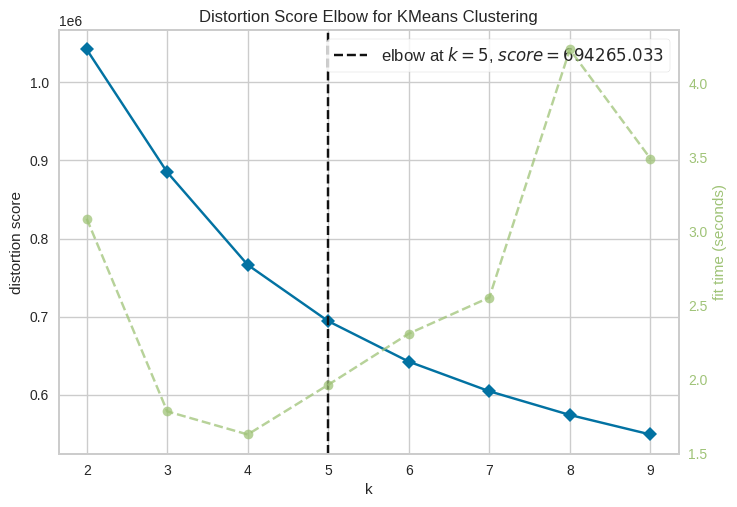

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
model = KMeans(random_state=123, n_init=10, max_iter=100)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized)
visualizer.show()

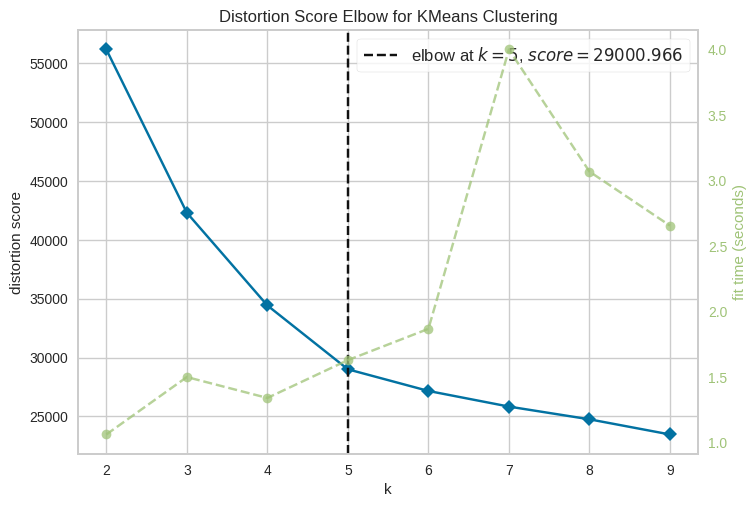

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
# Use the Elbow method to find the optimal number of clusters (k) with normalized data
model = KMeans(random_state=123, n_init=10, max_iter=100)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized_minmax)
visualizer.show()

The graph above shows the reduction of a distortion score as the number of clusters increases. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

Another way to choose the best number of clusters is to plot the silhouette score in a function of number of clusters.

In [18]:
from sklearn.metrics import silhouette_score

In [19]:
X_normalized.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.468095   0.283731             -1.083592     0.609564          -0.043078   
1  0.288470  -0.342688             -0.173106     0.609564          -0.190055   
2 -0.658684  -2.089511             -1.083592     0.609564          -0.520755   
3  0.894079   0.169253              0.464233     0.609564          -0.557499   
4  0.862999   0.175742             -1.356737     0.609564          -0.079822   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0     -0.506714       1.595250       -0.314181                -1.242430   
1     -0.506714      -0.731586       -0.314181                -0.900968   
2      2.435402      -0.731586       -0.314181                -0.806138   
3      0.473991       0.819638       -0.314181                 1.216775   
4     -0.506714       1.595250       -0.314181                 0.287388   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0             -0.563601              -0.431560                0.259480   
1             -0.355775              -0.431560               -0.507694   
2              0.881538               3.475496               -0.507694   
3             -0.666069              -0.111310               -0.377021   
4             -0.759591              -0.431560               -0.380515   

   unharmed_in_month_ratio  
0                -0.277029  
1                -0.277029  
2                -0.277029  
3                -0.277029  
4                -0.277029

In [20]:
X_normalized_minmax.head()

latitude  longitude  avg_age_participants  males_ratio  povertyPercentage  \
0  0.450468   0.719192              0.238095          1.0           0.385185   
1  0.424894   0.597439              0.396825          1.0           0.355556   
2  0.290045   0.257919              0.238095          1.0           0.288889   
3  0.511117   0.696942              0.507937          1.0           0.281481   
4  0.506692   0.698203              0.190476          1.0           0.377778   

   killed_ratio  injured_ratio  unharmed_ratio  candidate_winning_ratio  \
0      0.000000       1.000000             0.0                 0.229039   
1      0.000000       0.000000             0.0                 0.298817   
2      1.000000       0.000000             0.0                 0.318196   
3      0.333333       0.666667             0.0                 0.731582   
4      0.000000       1.000000             0.0                 0.541660   

   males_in_month_ratio  killed_in_month_ratio  injured_in_month_ratio  \
0              0.059748               0.000000                0.139785   
1              0.094527               0.000000                0.000000   
2              0.301587               0.800000                0.000000   
3              0.042601               0.065574                0.023810   
4              0.026950               0.000000                0.023173   

   unharmed_in_month_ratio  
0                      0.0  
1                      0.0  
2                      0.0  
3                      0.0  
4                      0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

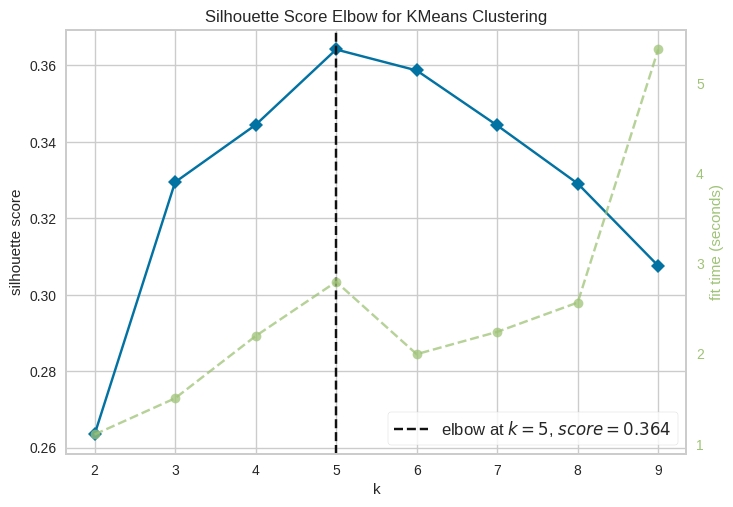

In [21]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_normalized_minmax)
visualizer.show()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

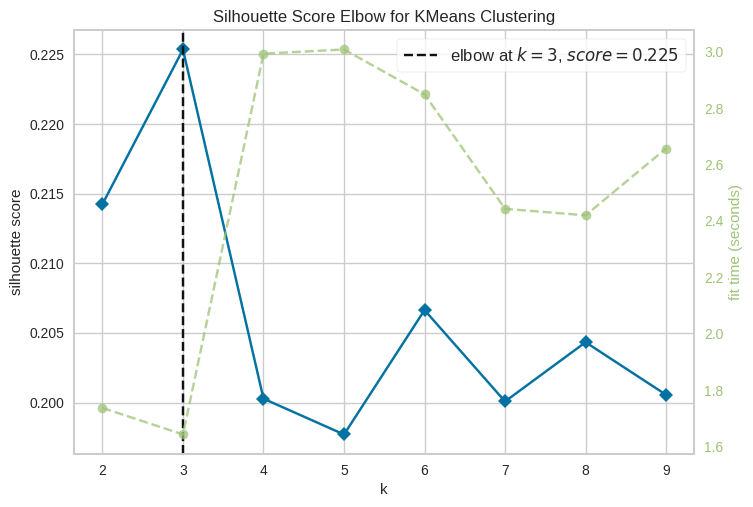

In [22]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

visualizer.fit(X_normalized)
visualizer.show()
plt.show()

Using the standard scaler gives a lower sihouette score so we use the the minmax scaler

### Setting Optimal K value

In [23]:
k_optimal = 5

## Characterization of Obtained Clusters

In [24]:
# Perform K-means clustering with the optimal k value
kmeans = KMeans(n_clusters=k_optimal)
kmeans.fit(X_normalized_minmax)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
labels

array([0, 4, 3, ..., 0, 3, 0], dtype=int32)

In [26]:
X_normalized_minmax['labels'] = labels

In [27]:
X_normalized_minmax.to_csv('data/dataset_kmeans_5clusters.csv', index=False)

In [28]:
# Print length of each obtained cluster
for k in range(k_optimal):
    cluster_data = X_normalized_minmax[labels == k]
    print(f"Cluster {k + 1}: {len(cluster_data)}")

Cluster 1: 28120
Cluster 2: 17350
Cluster 3: 8472
Cluster 4: 17722
Cluster 5: 20897


Cluster 1
           latitude     longitude  avg_age_participants   males_ratio  \
count  28120.000000  28120.000000          28120.000000  28120.000000   
mean       0.403303      0.689861              0.396266      0.896823   
std        0.131517      0.162915              0.170622      0.269190   
min        0.000433      0.153596              0.095238      0.000000   
25%        0.312053      0.662619              0.269841      1.000000   
50%        0.443505      0.698834              0.349206      1.000000   
75%        0.507582      0.783817              0.492063      1.000000   
max        0.714866      1.000000              1.000000      1.000000   

       povertyPercentage  killed_ratio  injured_ratio  unharmed_ratio  \
count       28120.000000  28120.000000   28120.000000    28120.000000   
mean            0.377038      0.005115       0.920315        0.001014   
std             0.195409      0.043636       0.179662        0.021581   
min             0.000000      0.000000  

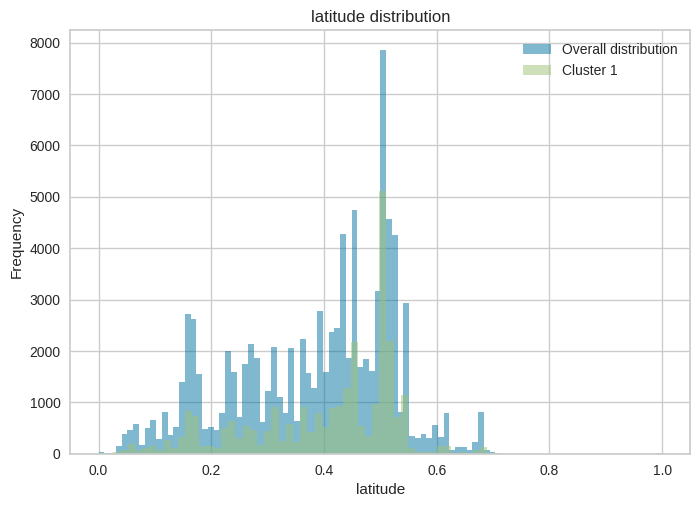

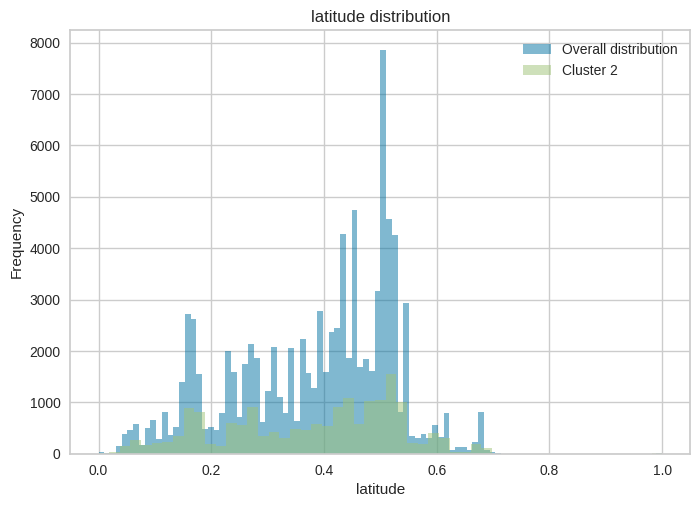

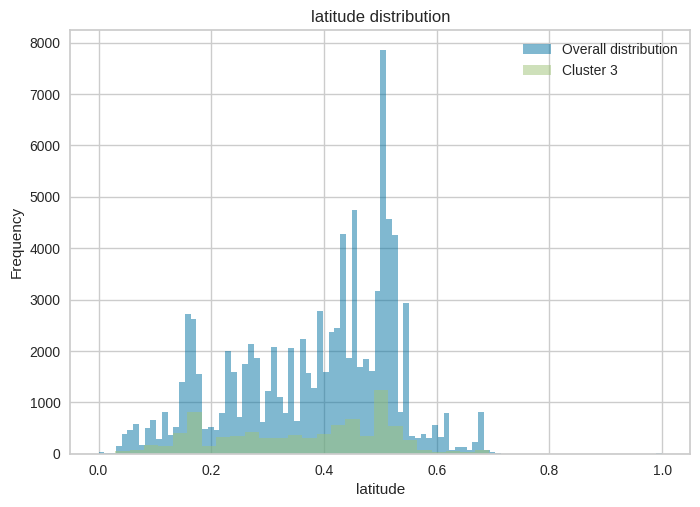

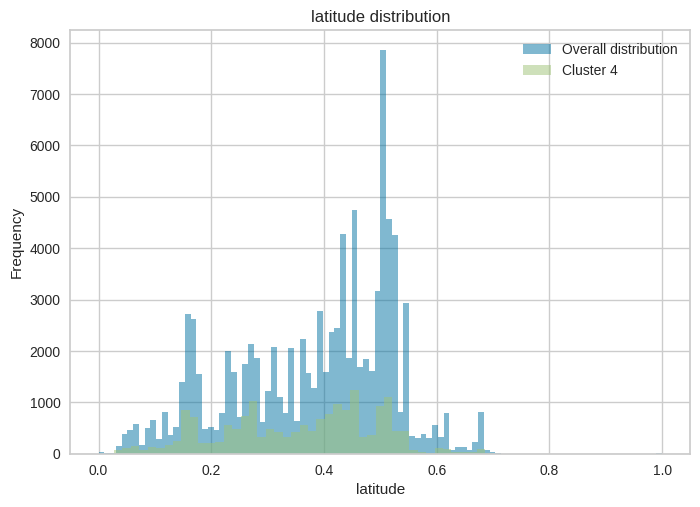

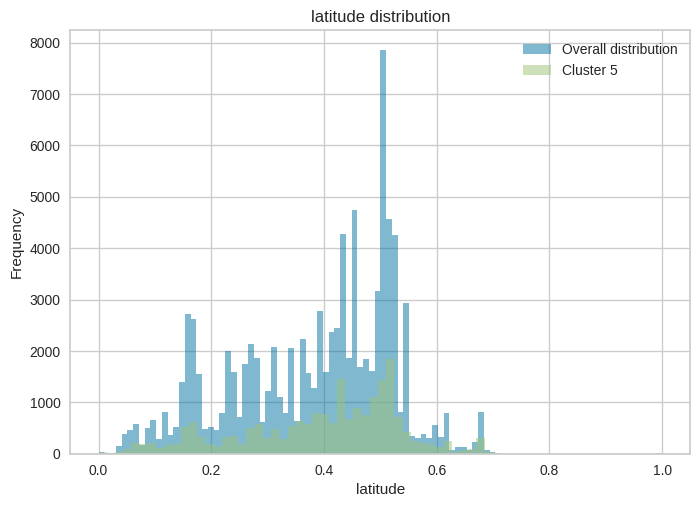

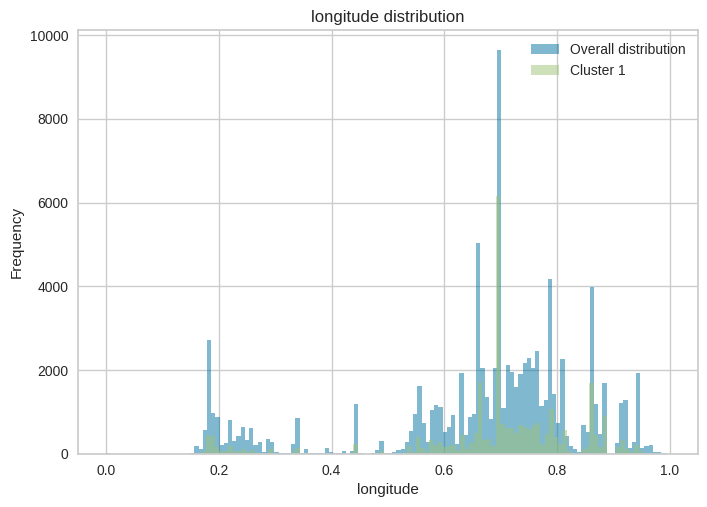

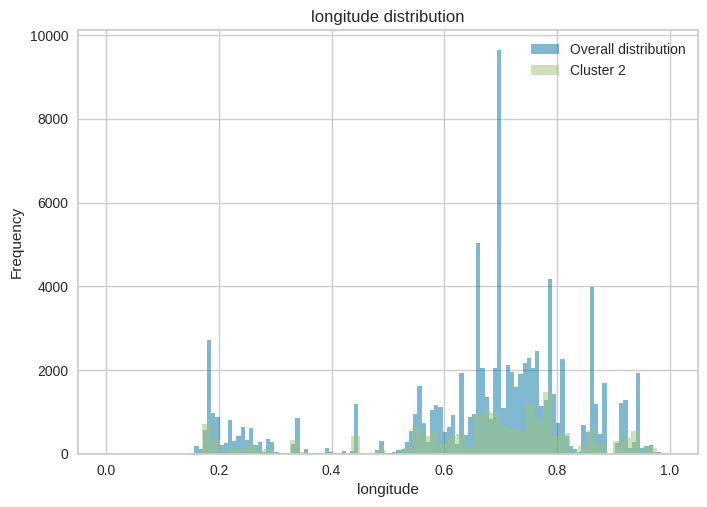

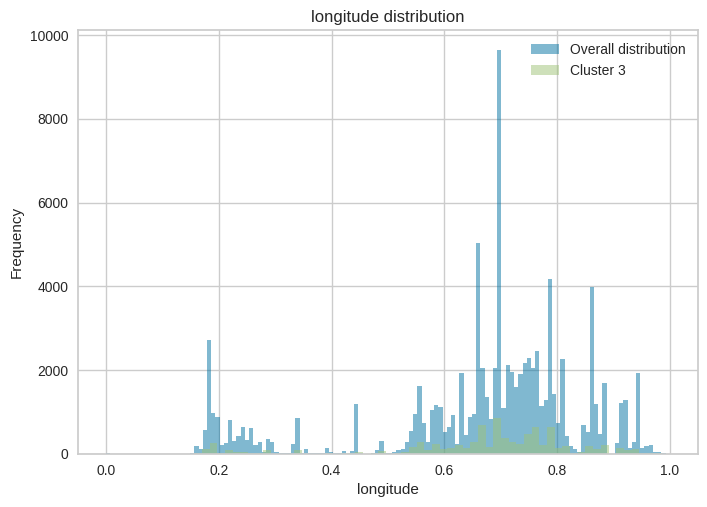

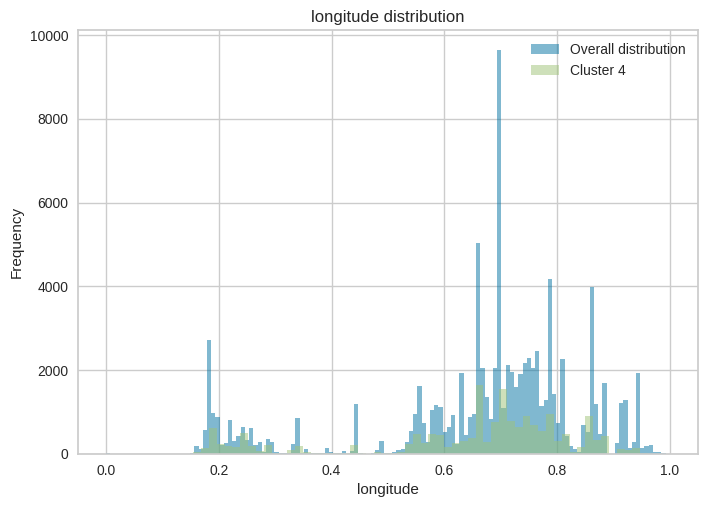

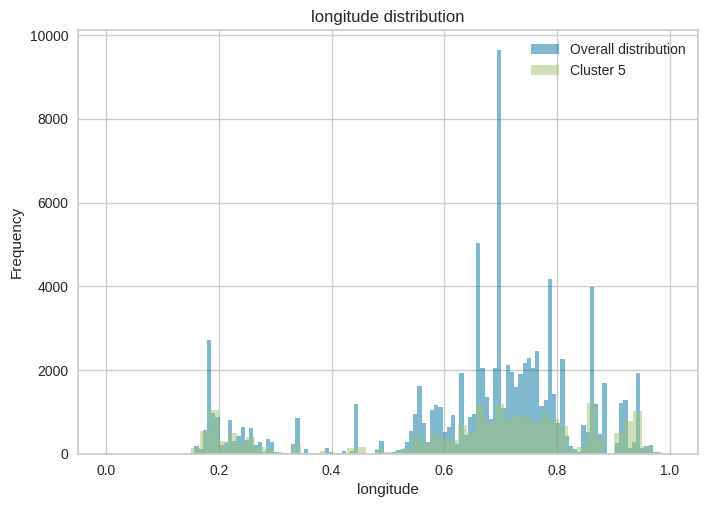

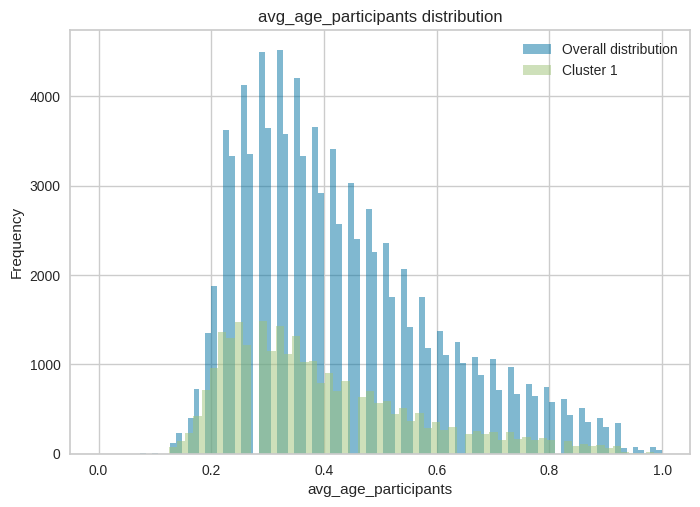

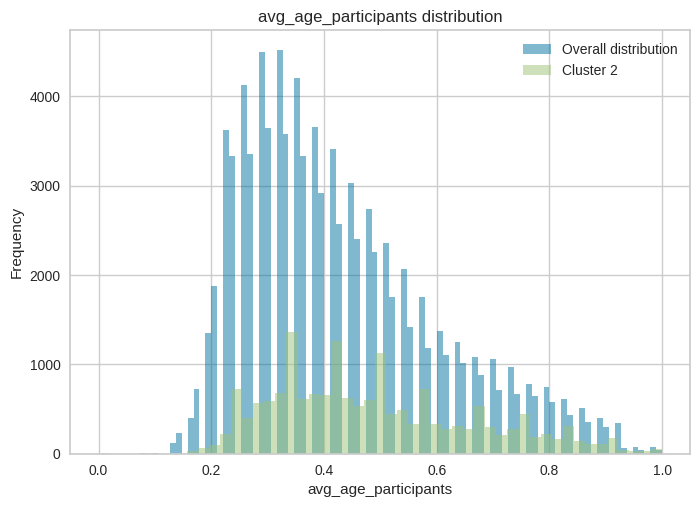

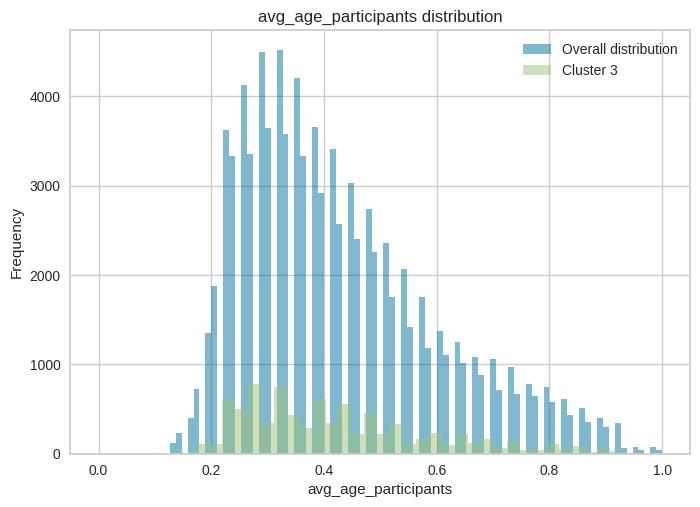

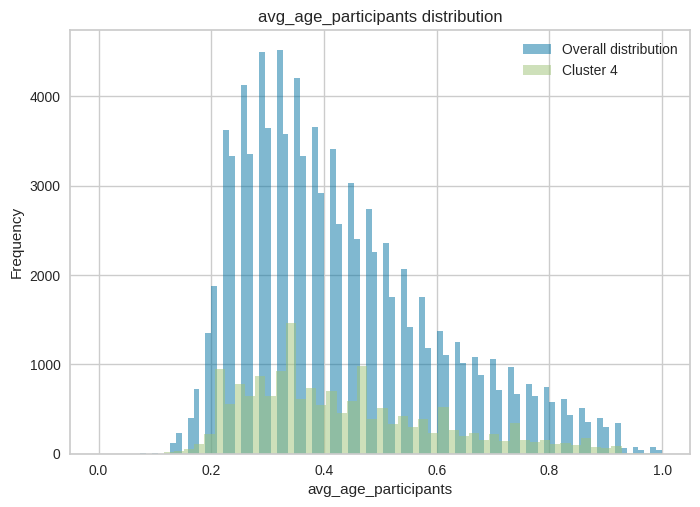

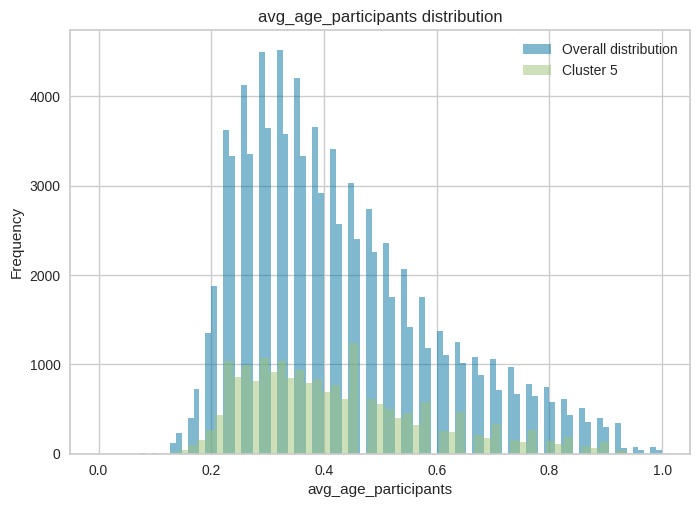

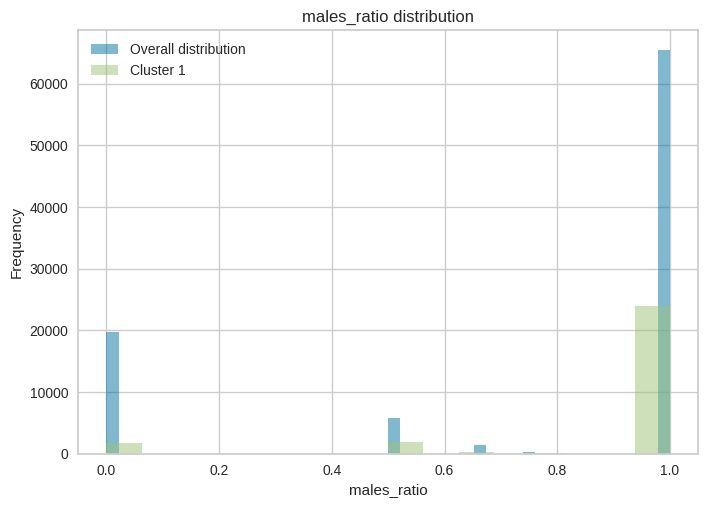

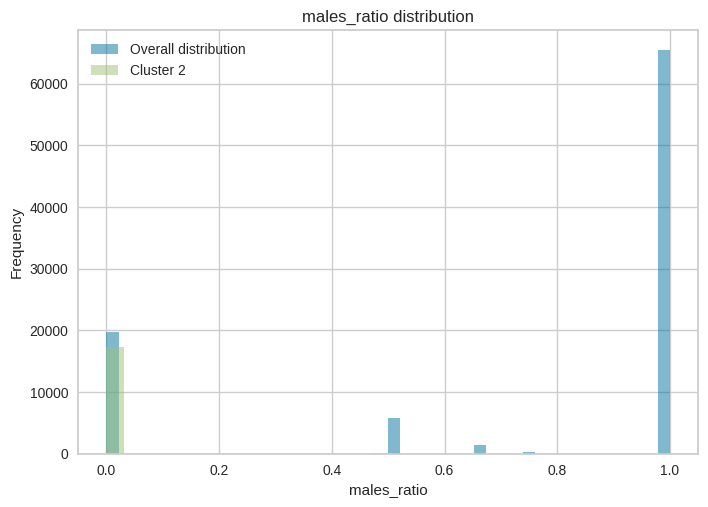

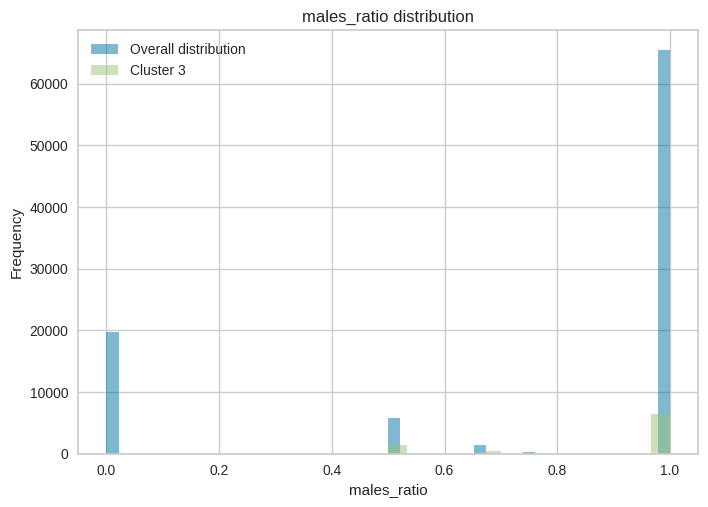

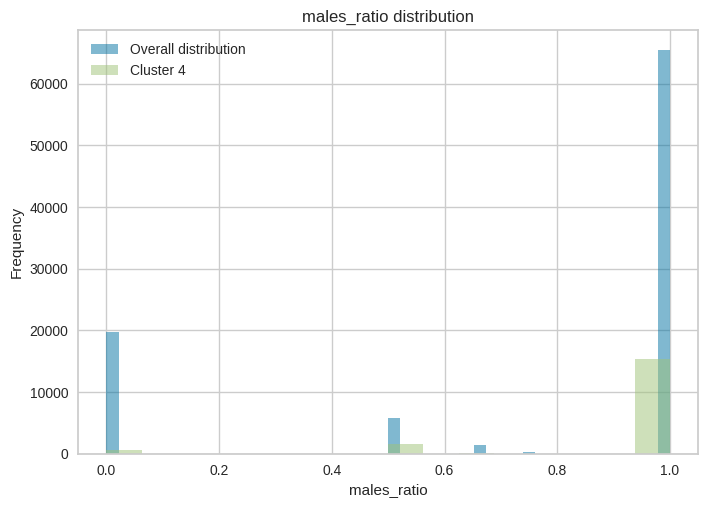

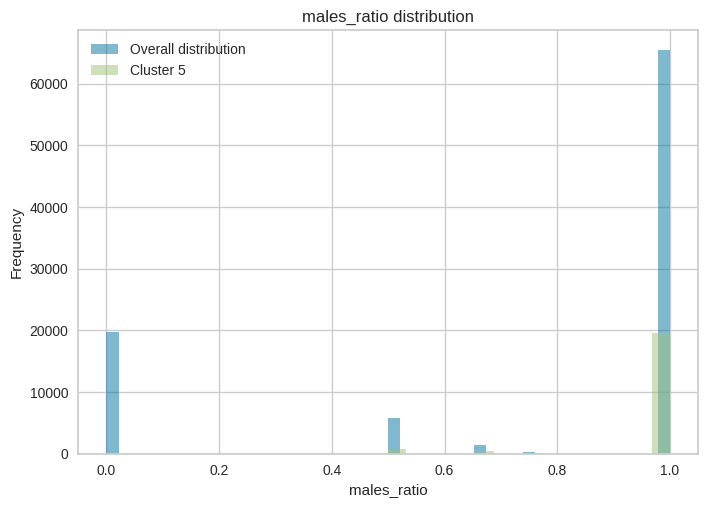

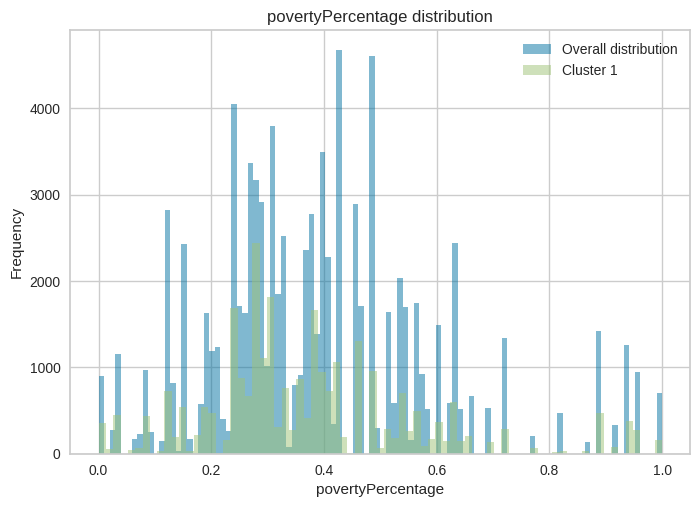

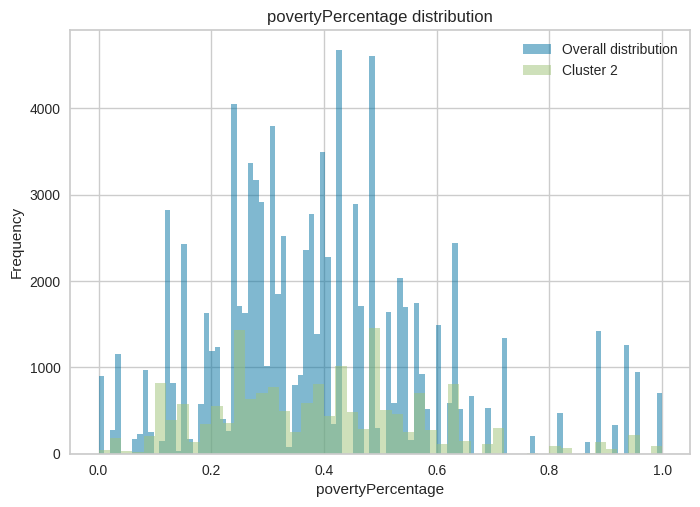

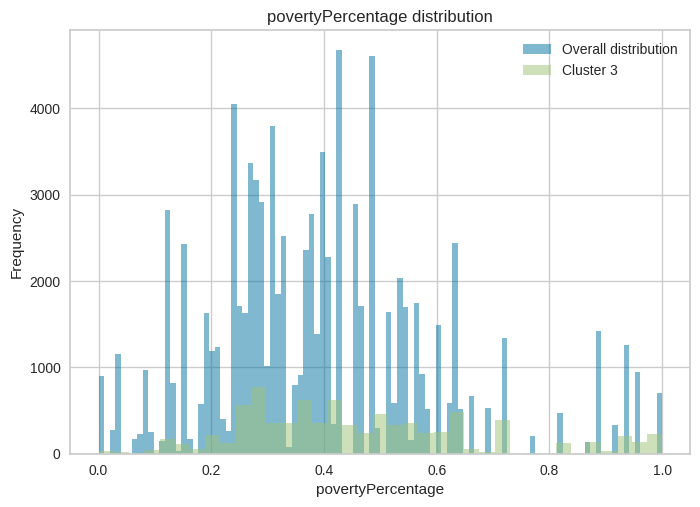

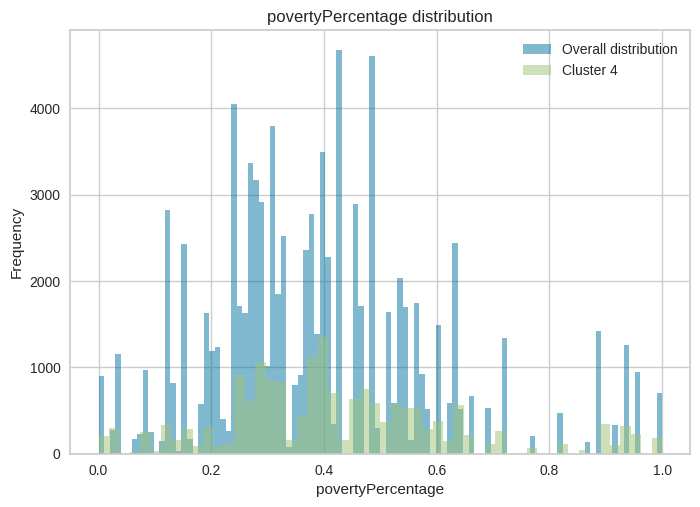

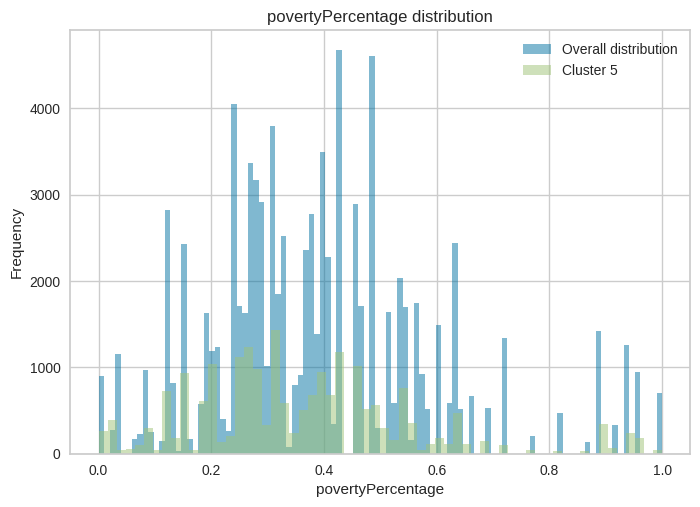

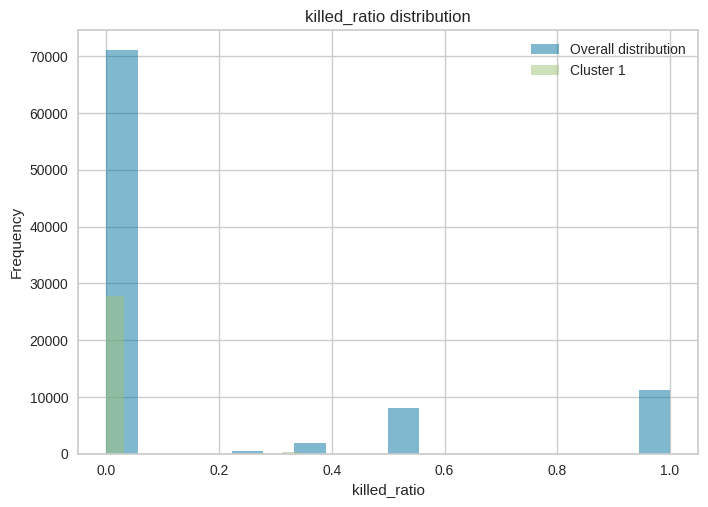

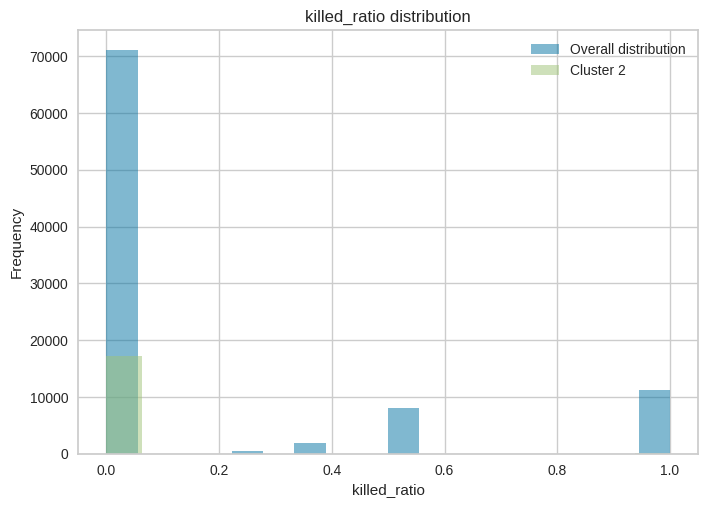

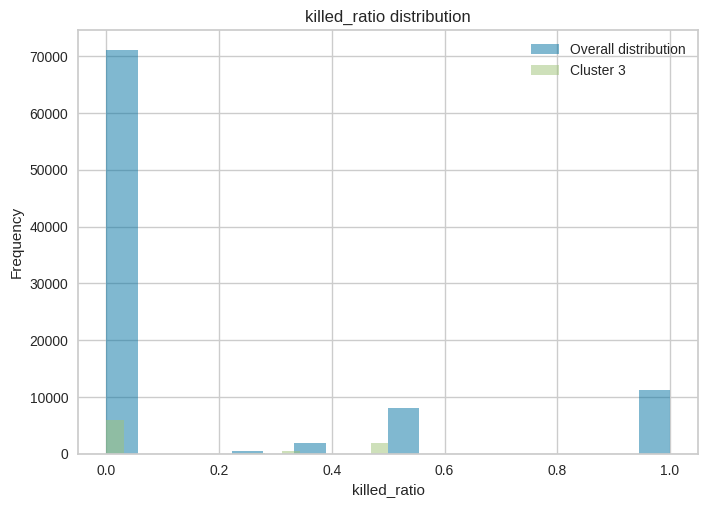

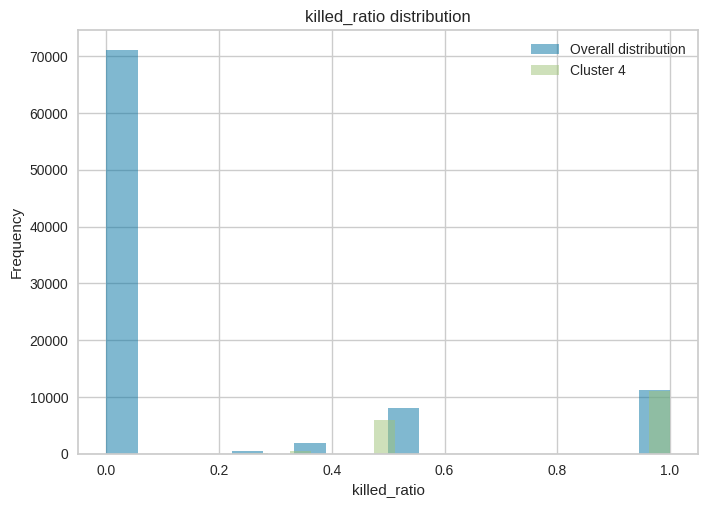

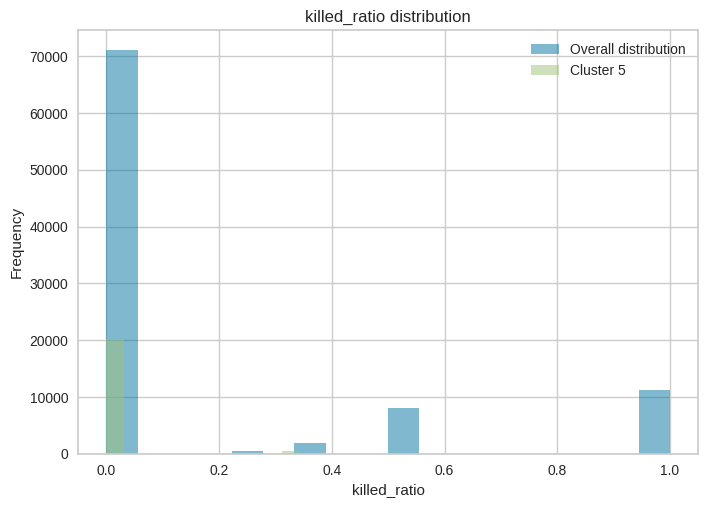

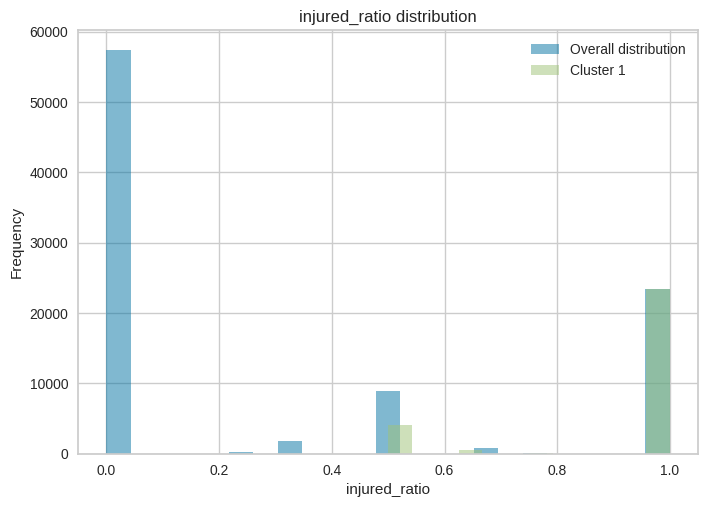

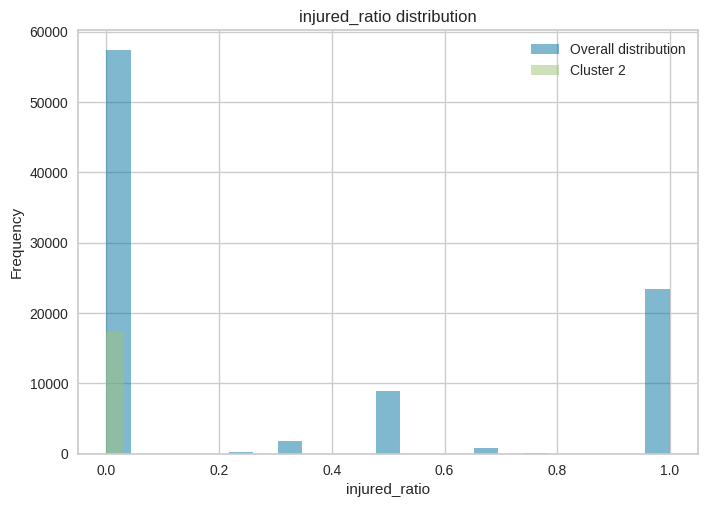

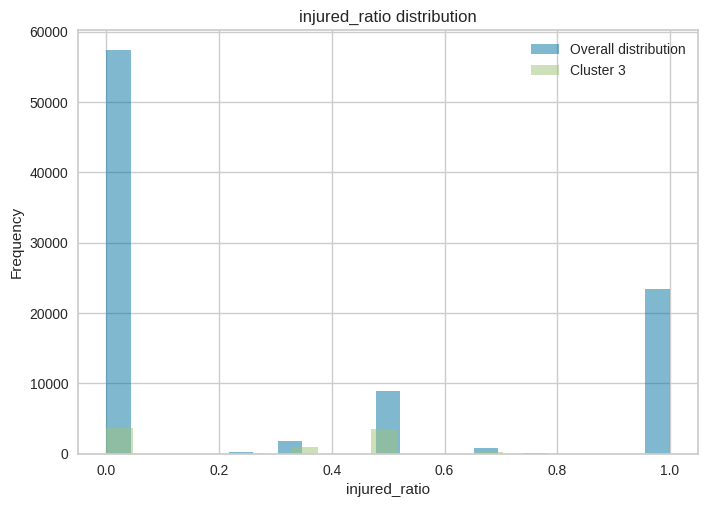

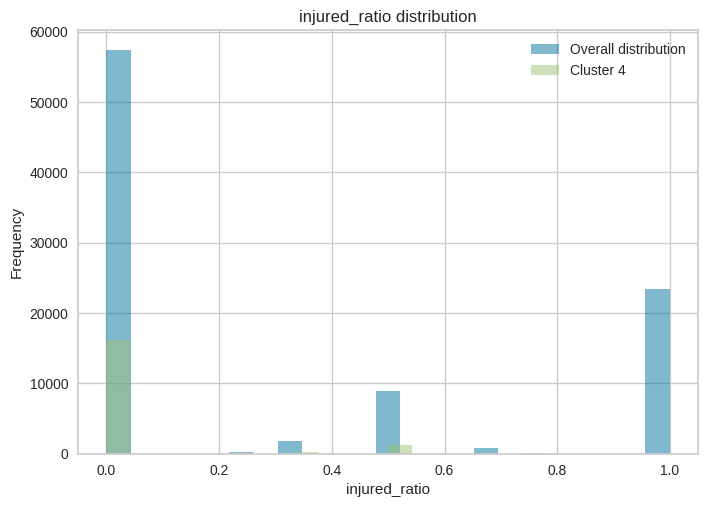

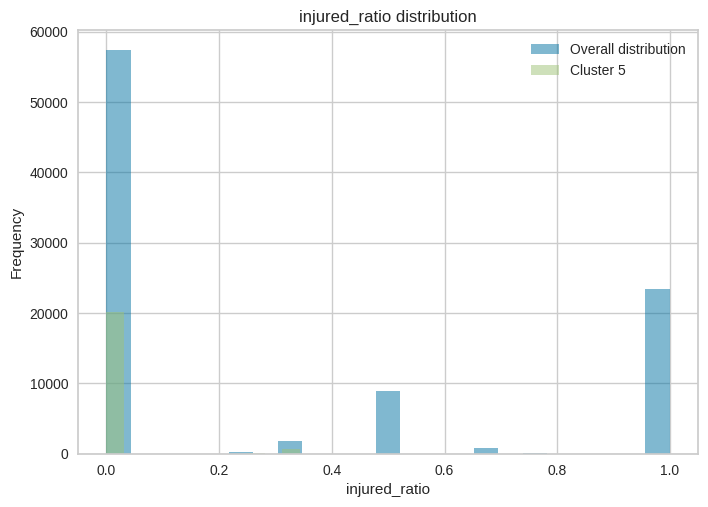

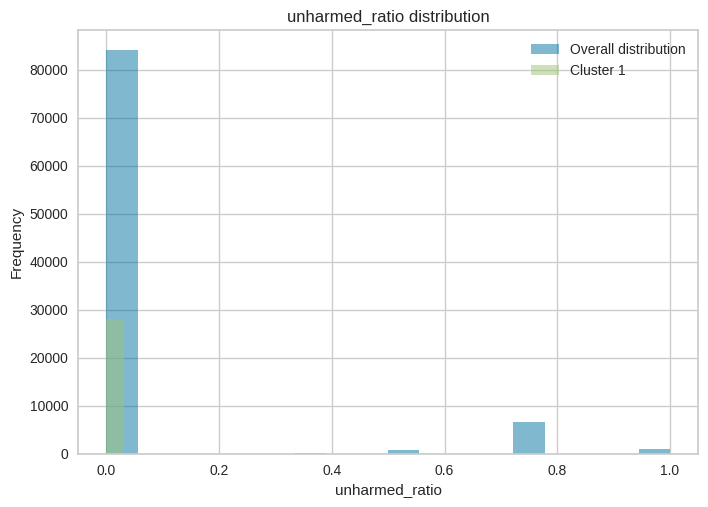

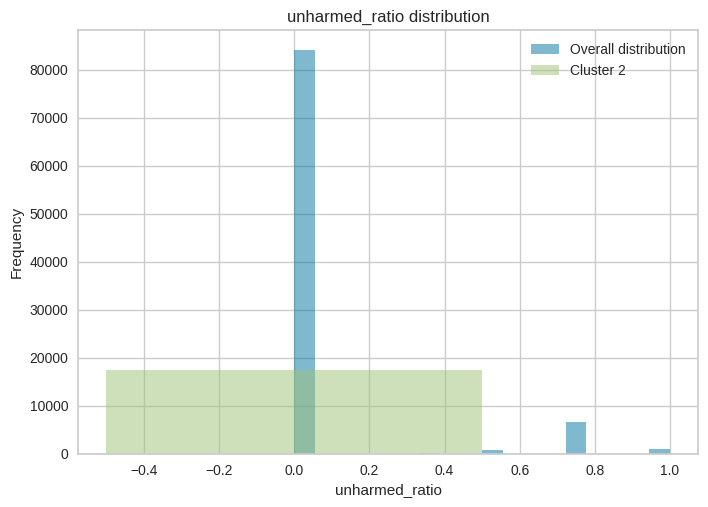

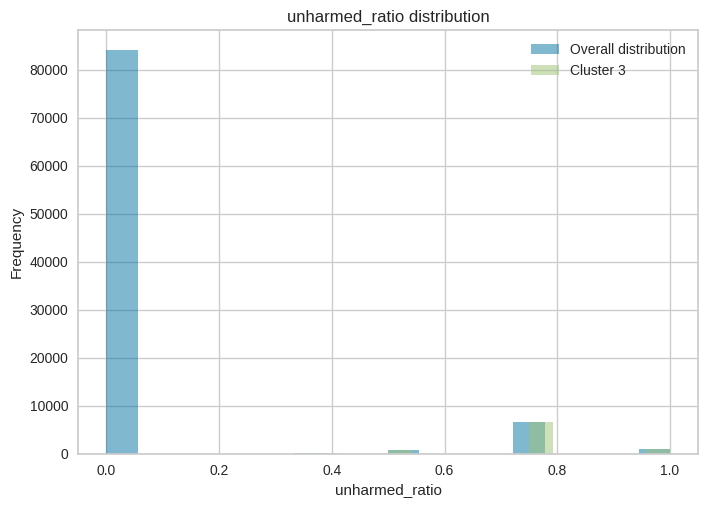

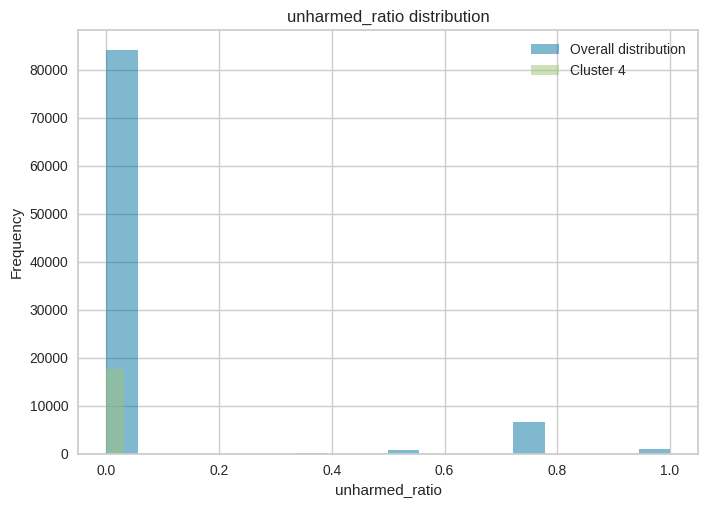

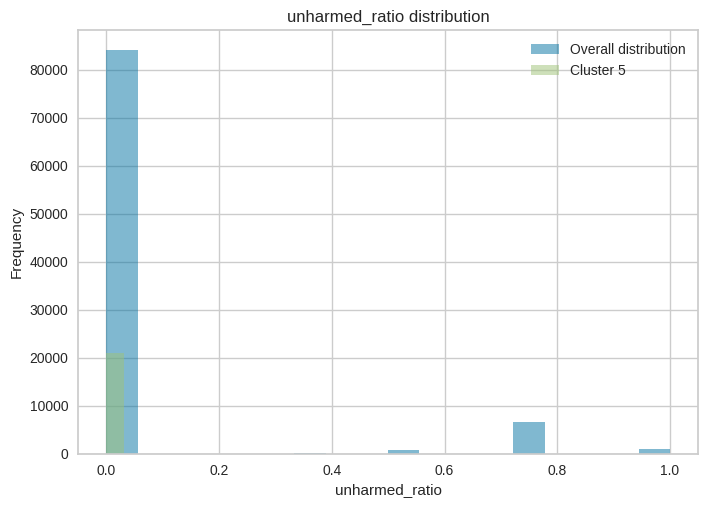

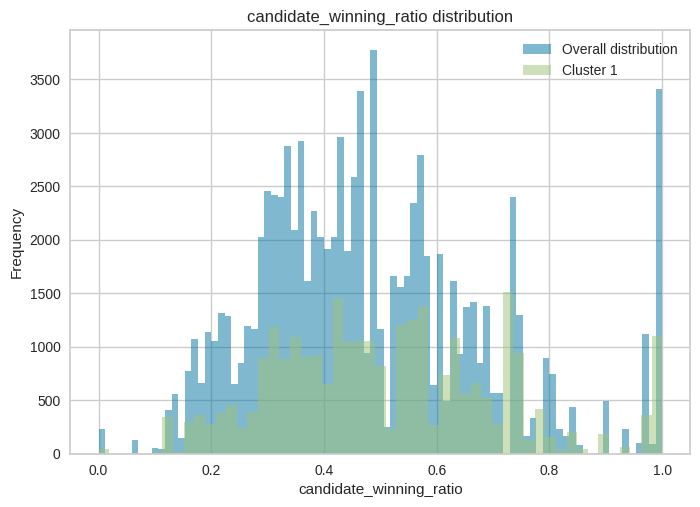

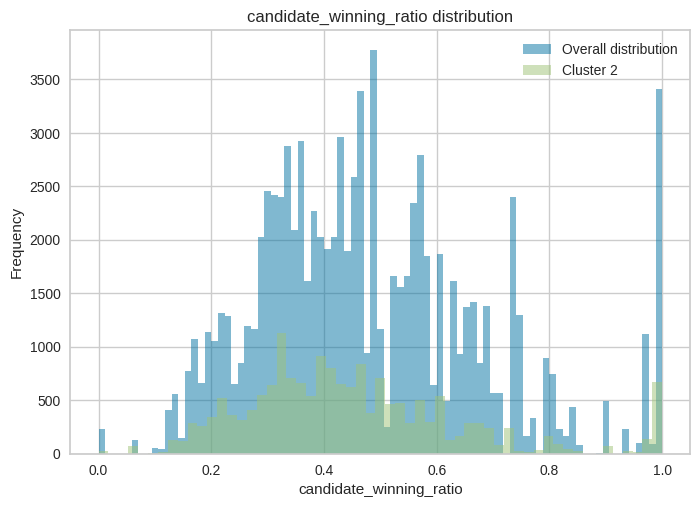

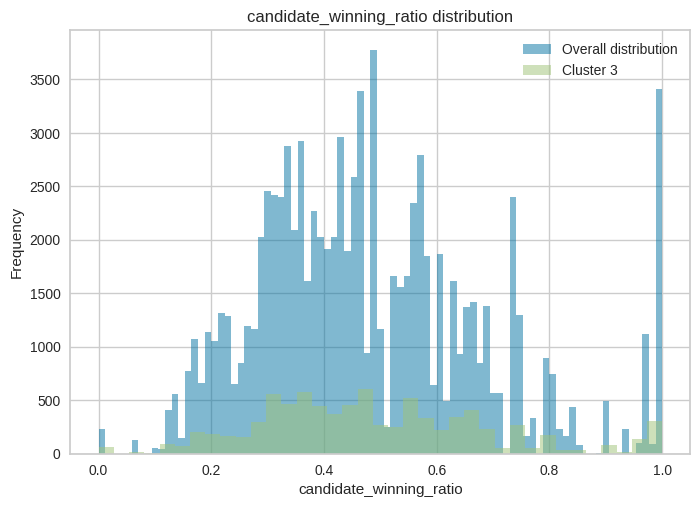

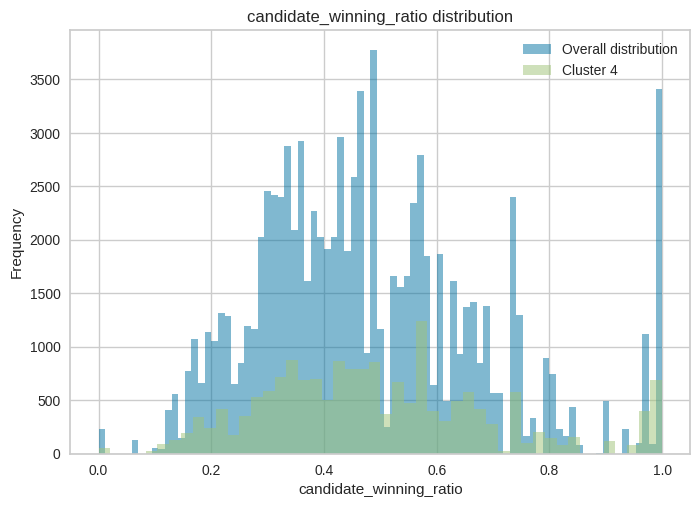

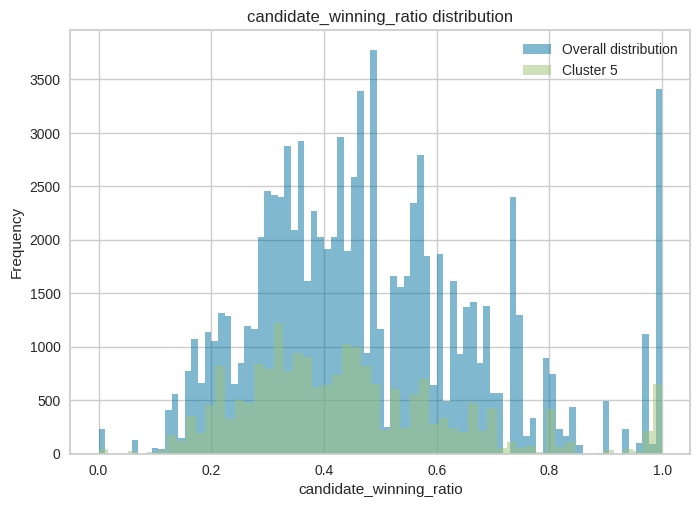

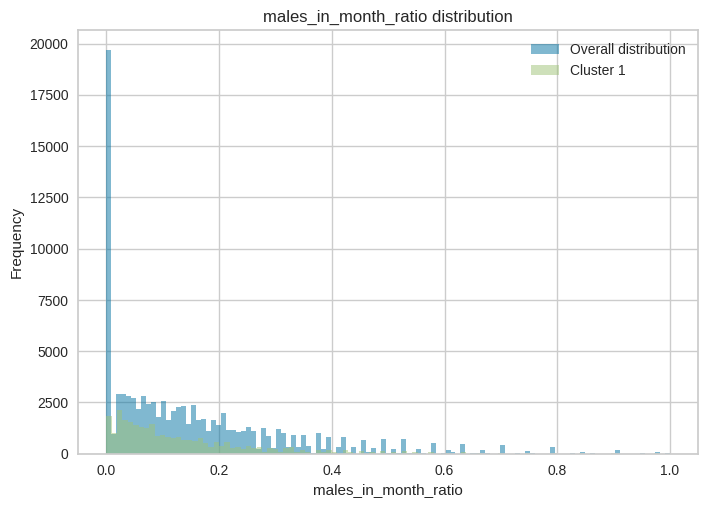

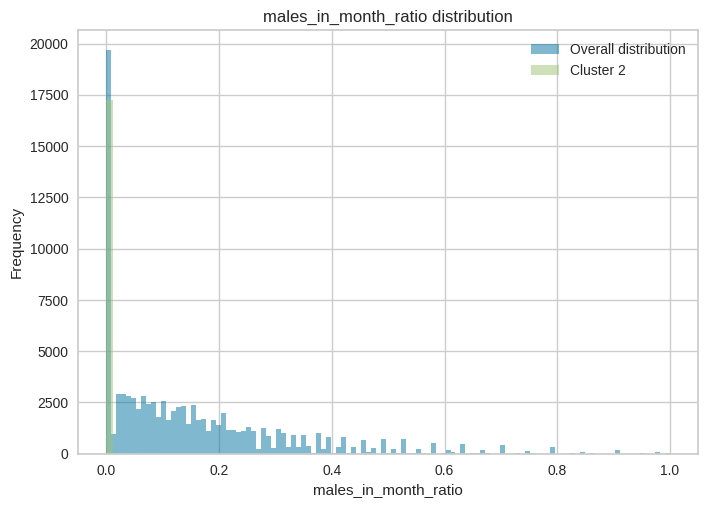

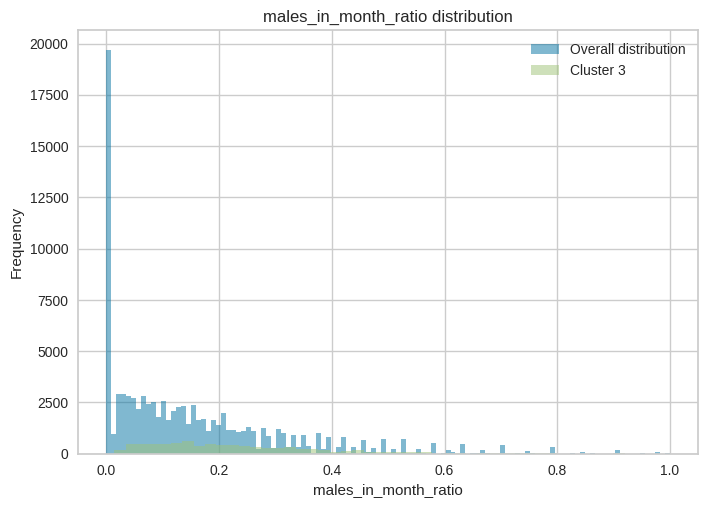

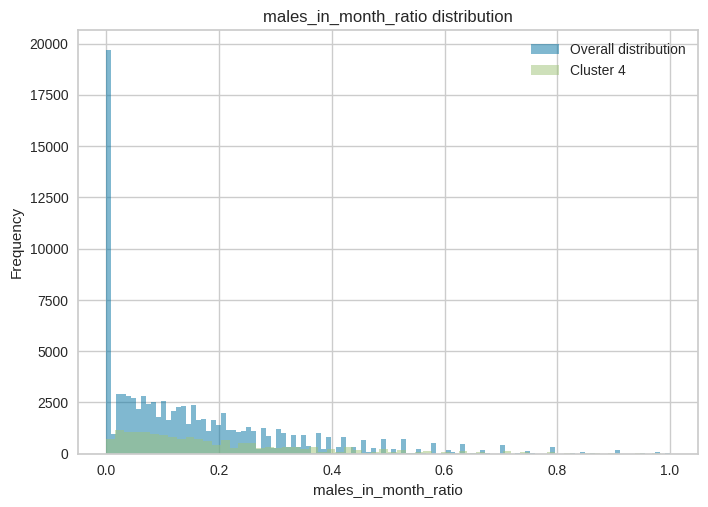

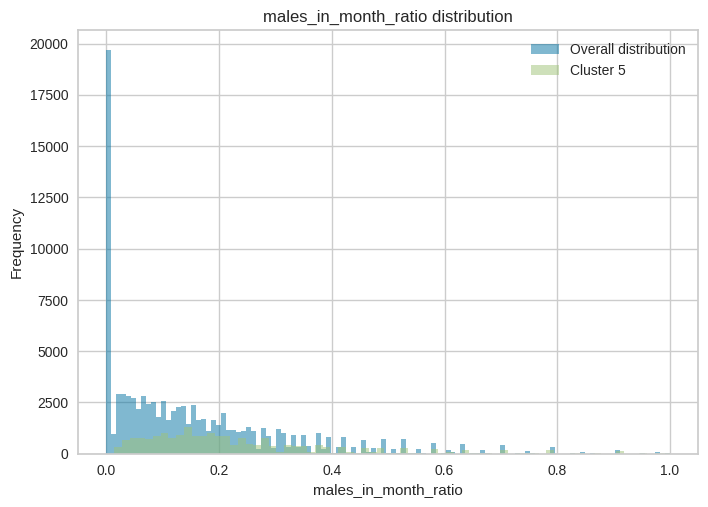

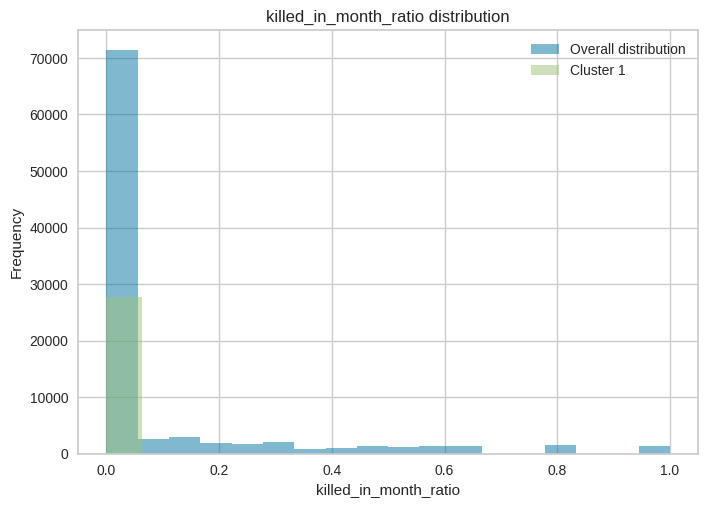

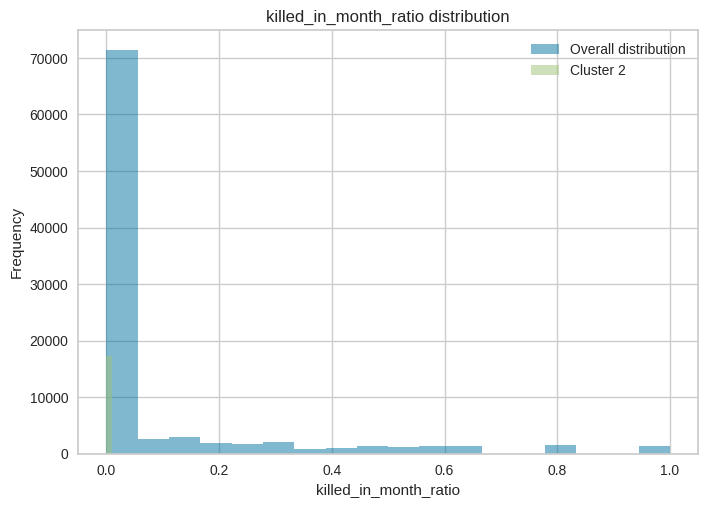

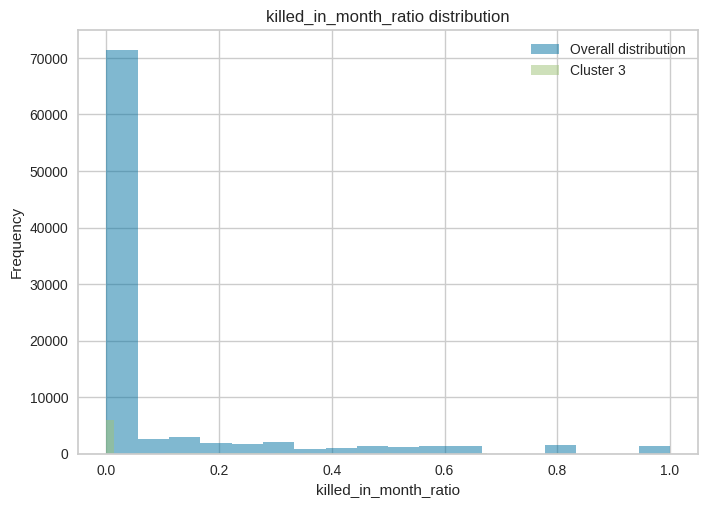

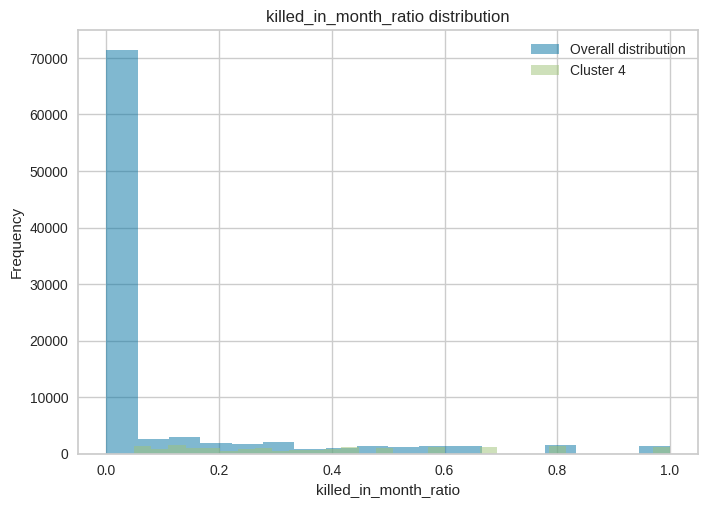

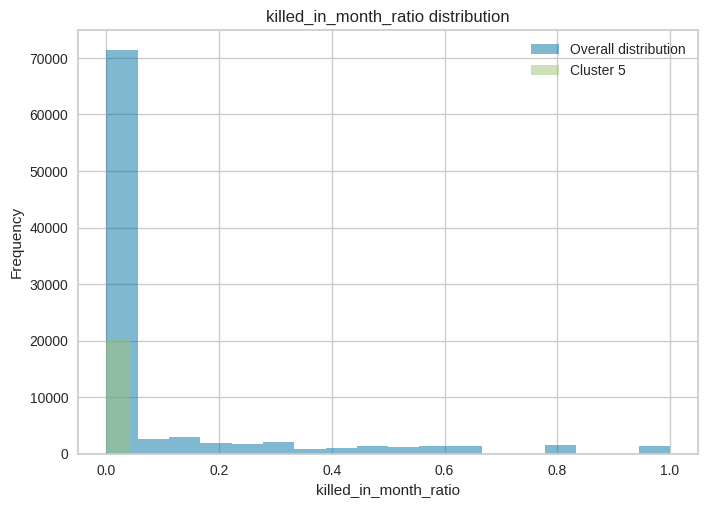

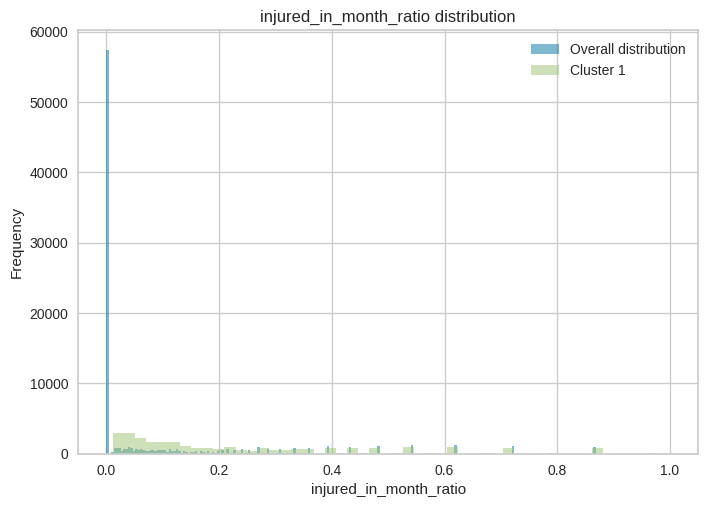

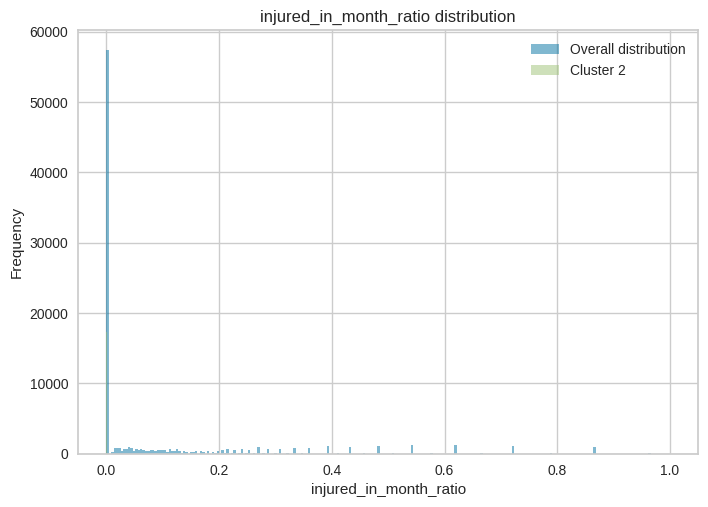

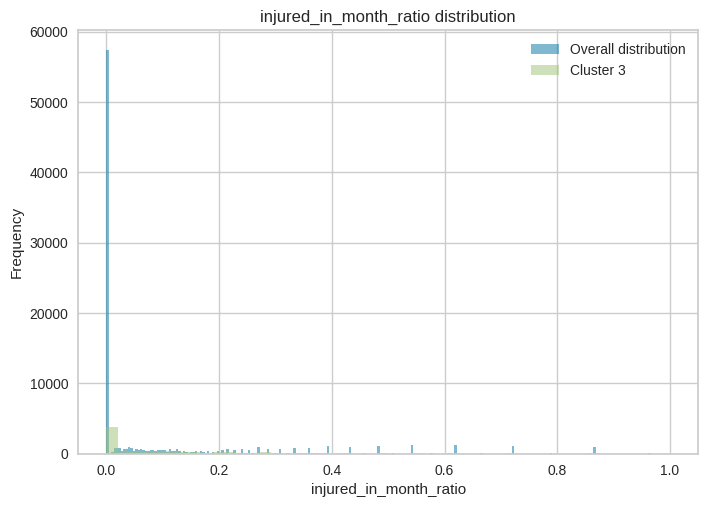

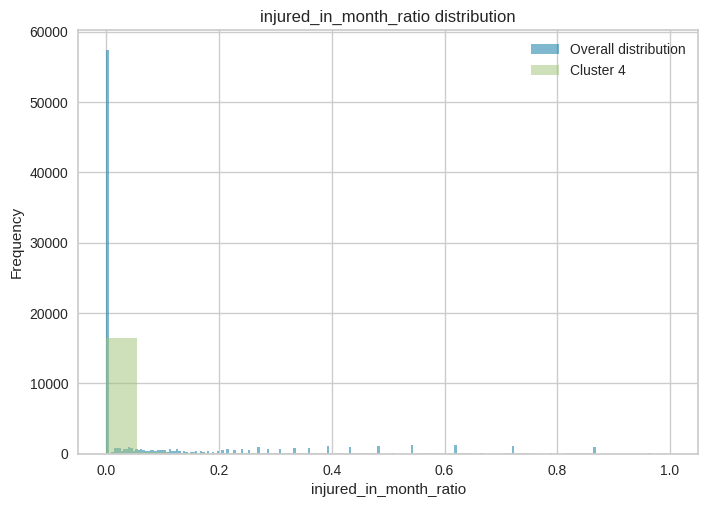

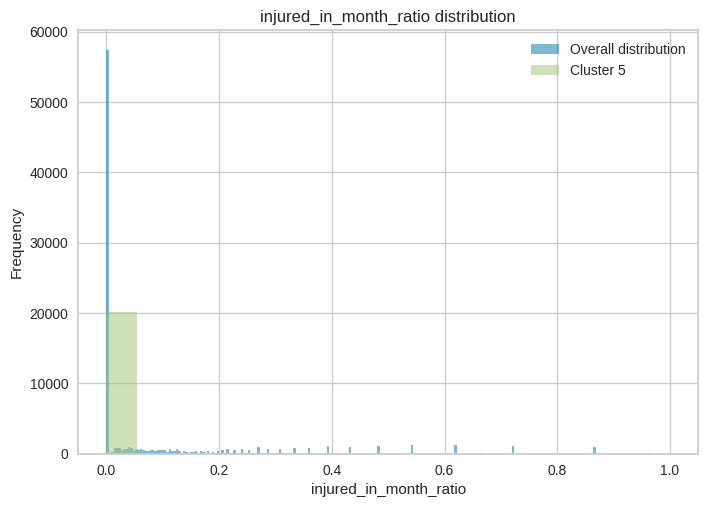

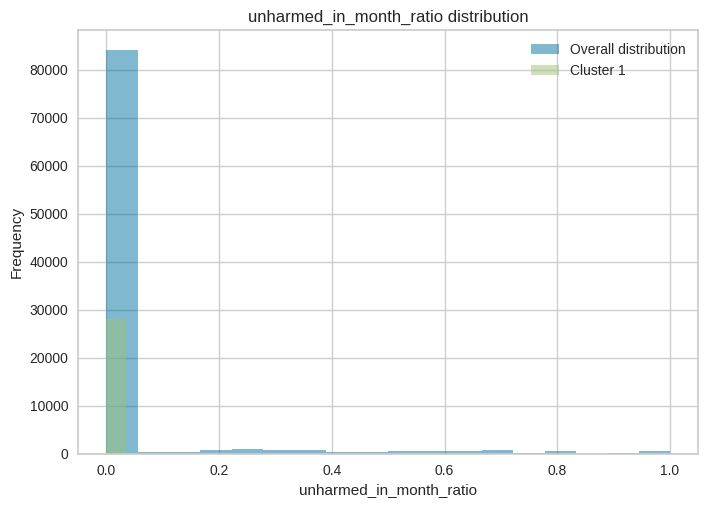

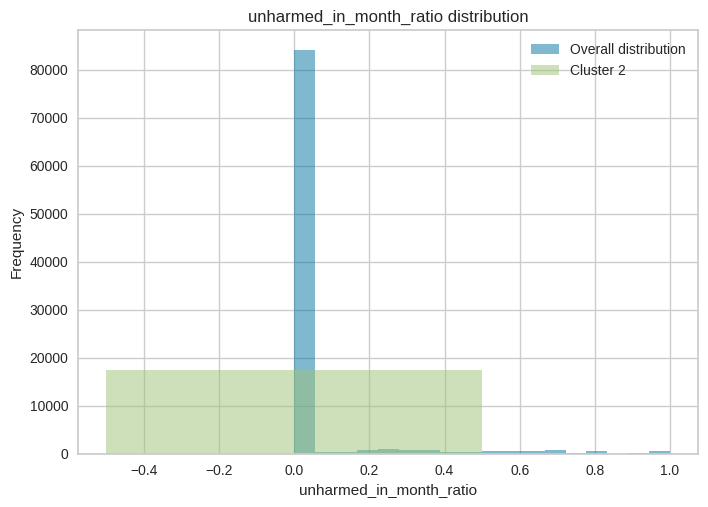

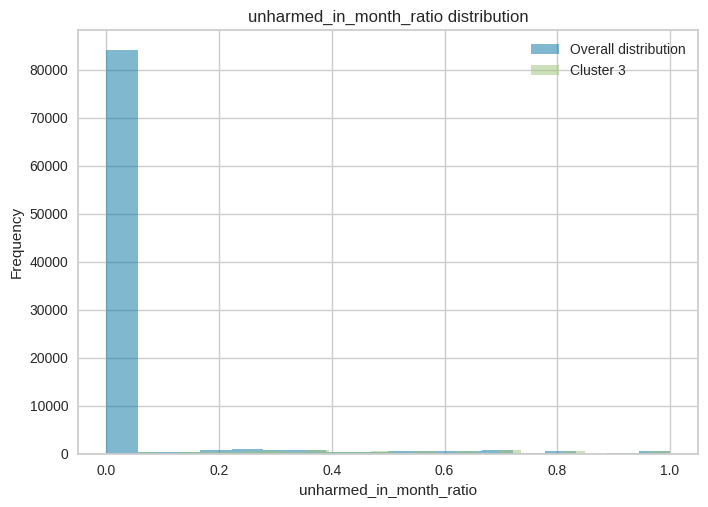

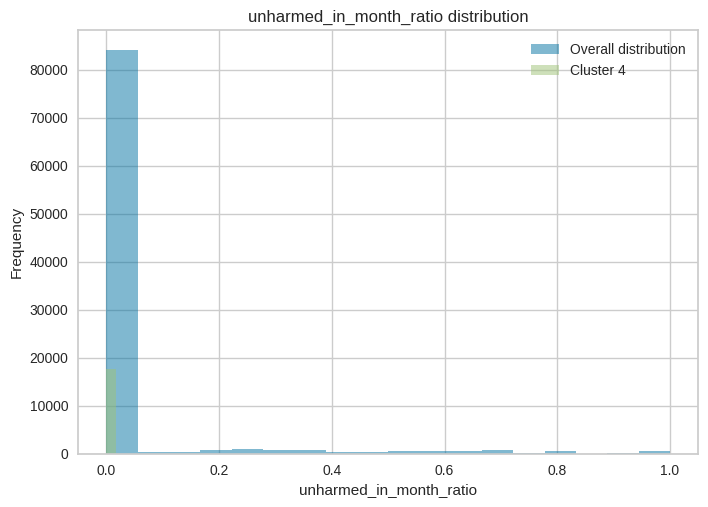

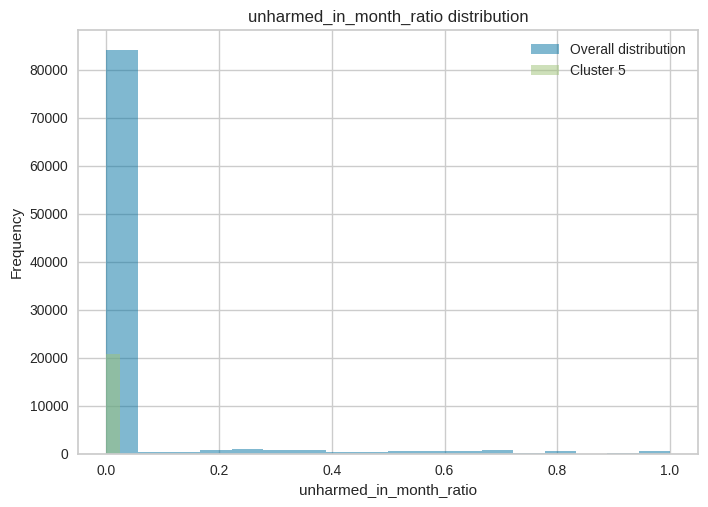

In [29]:
# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal):
    cluster_data = X_normalized_minmax[labels == k]
    print('Cluster', k + 1)
    print(cluster_data.describe())

# Compare the distribution of variables within each cluster to the overall distribution of the variables in the entire dataset
for col in X_normalized_minmax.columns:
    if col != 'labels':
      all_data = X_normalized_minmax[col]
      for k in range(k_optimal):
          cluster_data = X_normalized_minmax[labels == k][col]
          plt.hist(all_data, bins='auto', alpha=0.5, label='Overall distribution')
          plt.hist(cluster_data, bins='auto', alpha=0.5, label=f'Cluster {k + 1}')
          plt.title(f'{col} distribution')
          plt.xlabel(col)
          plt.ylabel('Frequency')
          plt.legend()
          plt.show()

## Evaluation of Clustering Results for K=5

In [30]:
X_normalized_minmax.drop(columns=['labels'], inplace=True)

In [31]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Calculate silhouette score
silhouette_score_val = silhouette_score(X_normalized_minmax, labels)
print(f'Silhouette score: {silhouette_score_val:.2f}')

# Calculate Calinski-Harabasz score
calinski_harabasz_score_val = calinski_harabasz_score(X_normalized_minmax, labels)
print(f'Calinski-Harabasz score: {calinski_harabasz_score_val:.2f}')

Silhouette score: 0.36
Calinski-Harabasz score: 37056.59


### Try Different Values of  K

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 1
           latitude     longitude  avg_age_participants   males_ratio  \
count  20912.000000  20912.000000          20912.000000  20912.000000   
mean       0.395388      0.649031              0.411670      0.973333   
std        0.142972      0.229778              0.164797      0.105401   
min        0.000068      0.150573              0.031746      0.500000   
25%        0.299961      0.575236              0.285714      1.000000   
50%        0.427788      0.700766              0.380952      1.000000   
75%        0.503742      0.801207              0.507937      1.000000   
max        0.714179      0.999523              1.000000      1.000000   

       povertyPercentage  killed_ratio  injured_ratio  unharmed_ratio  \
count       20912.000000  20912.000000    20912.00000    20912.000000   
mean            0.362427      0.011222        0.01217        0.000436   
std             0.193730      0.058715        0.06154        0.013244   
min             0.000000      0.000000  

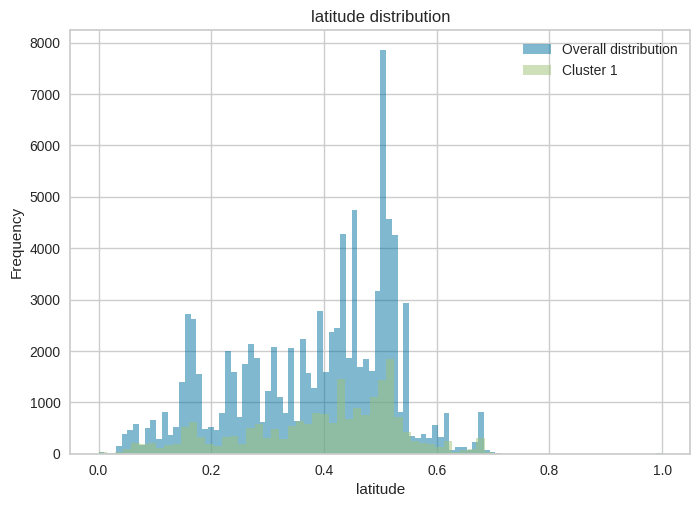

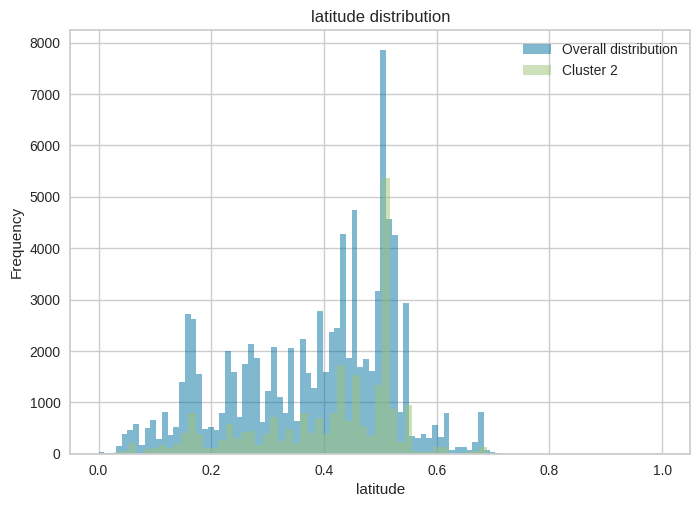

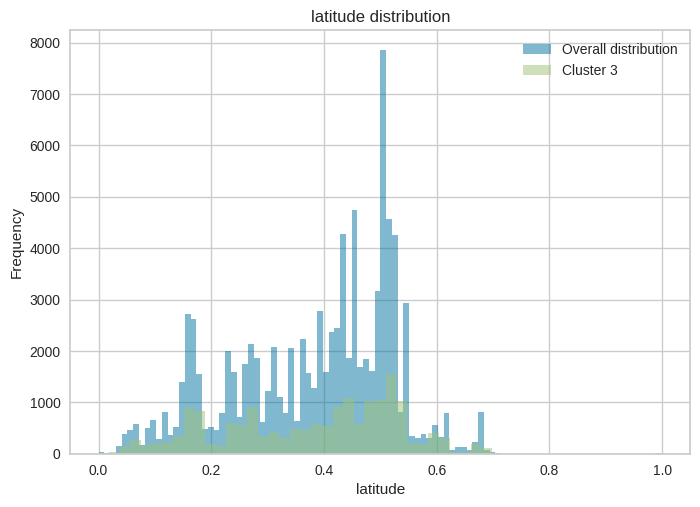

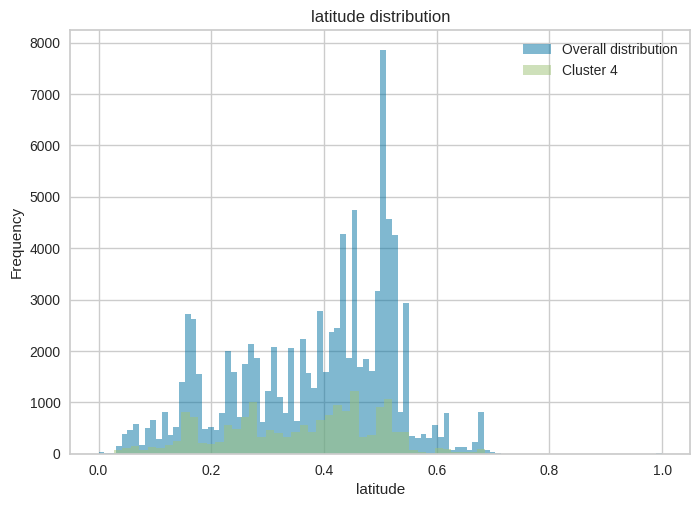

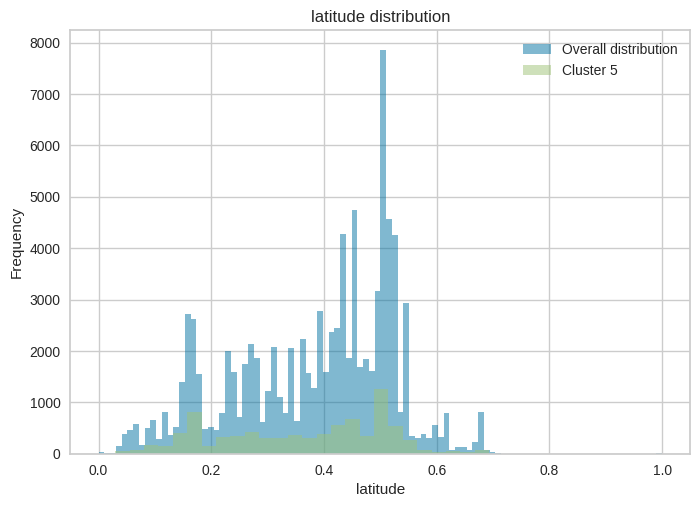

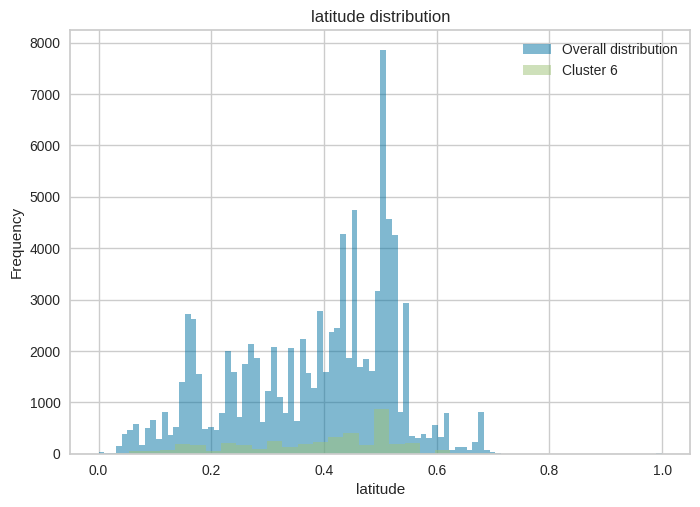

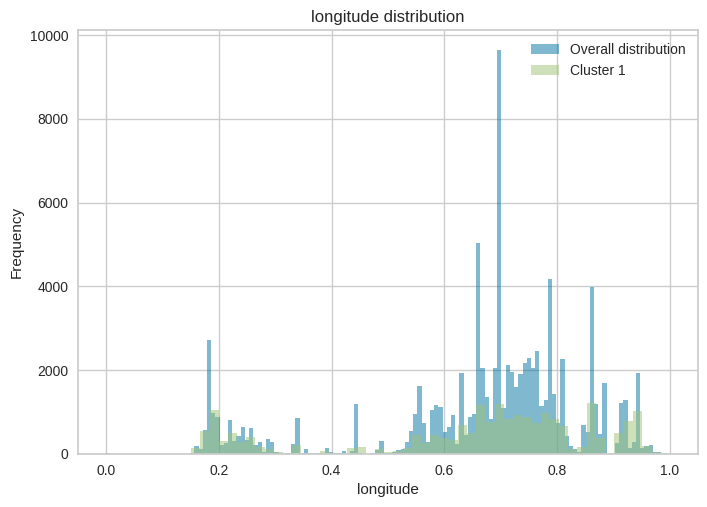

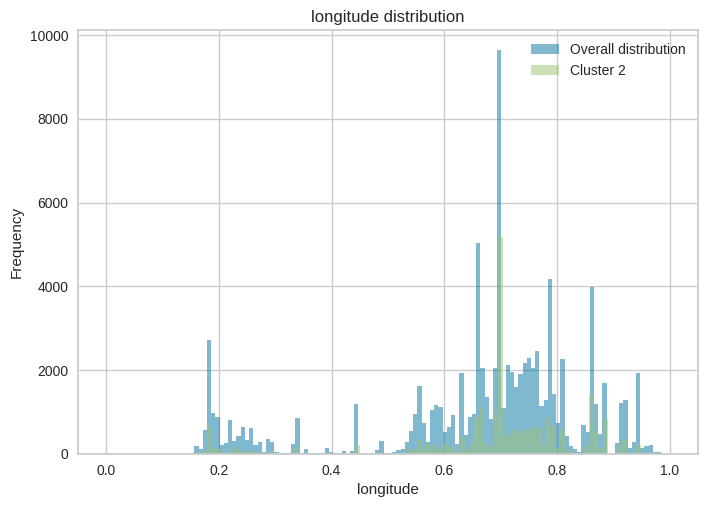

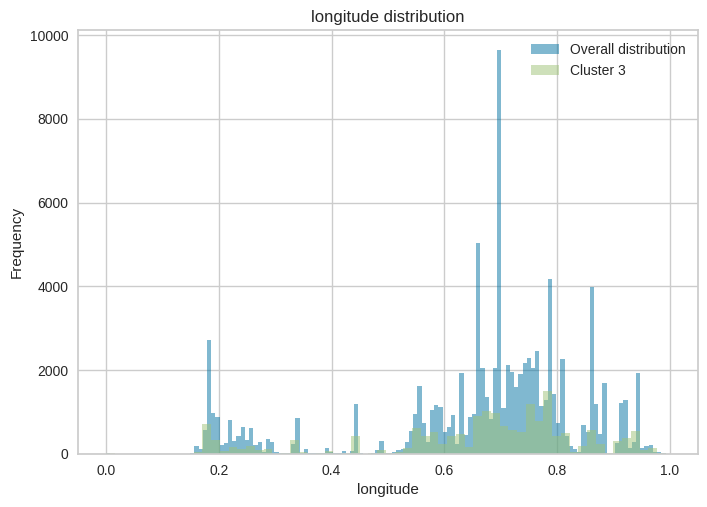

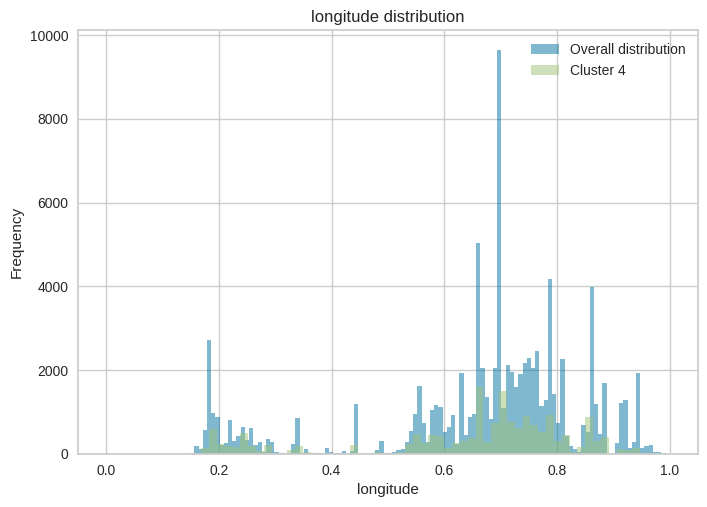

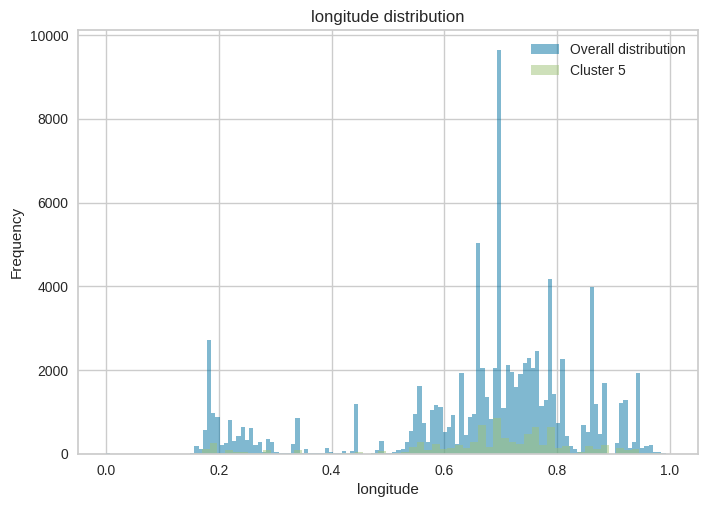

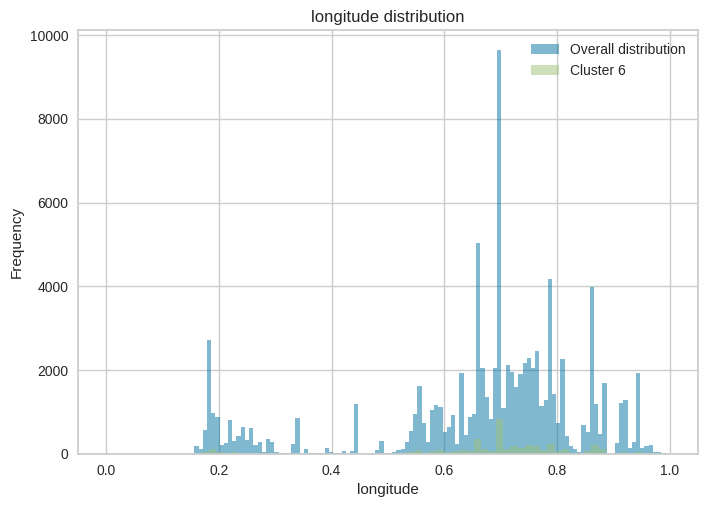

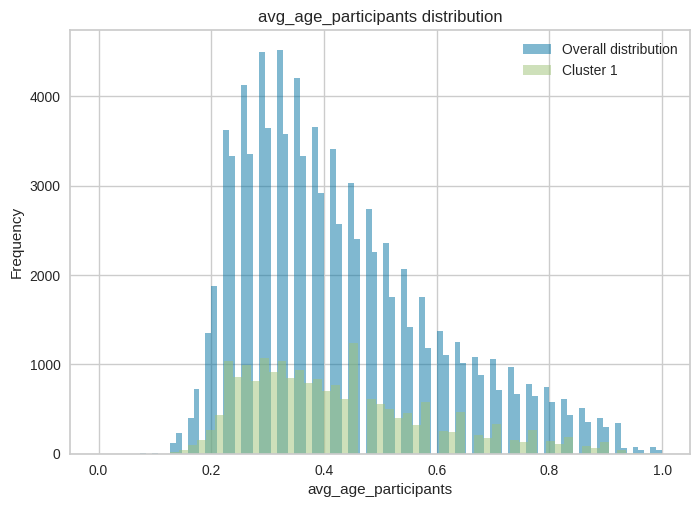

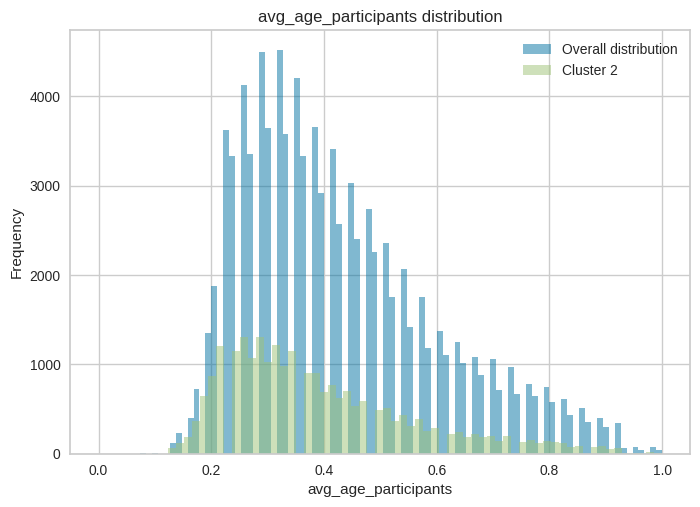

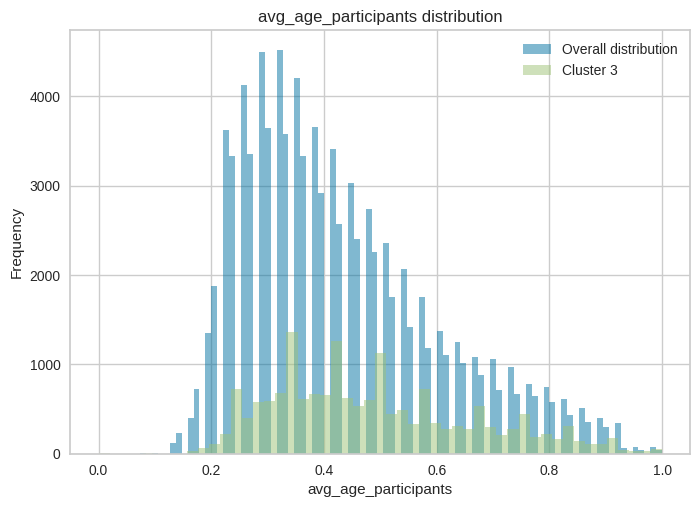

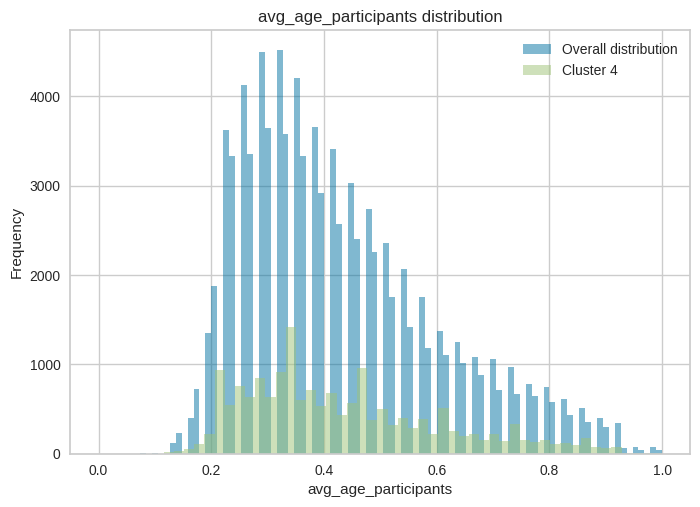

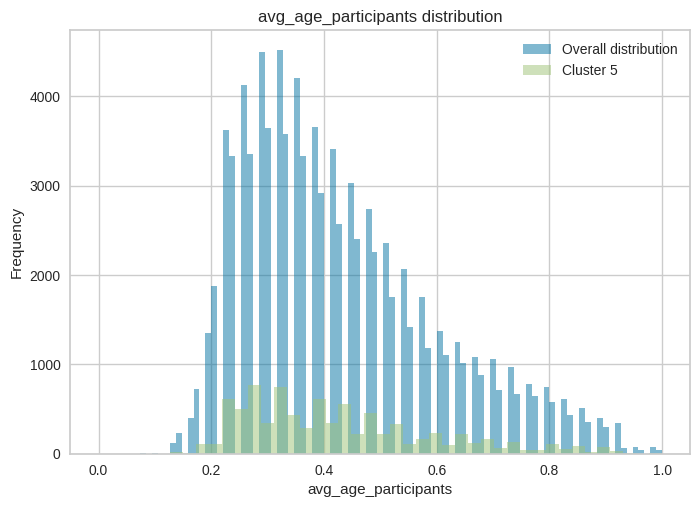

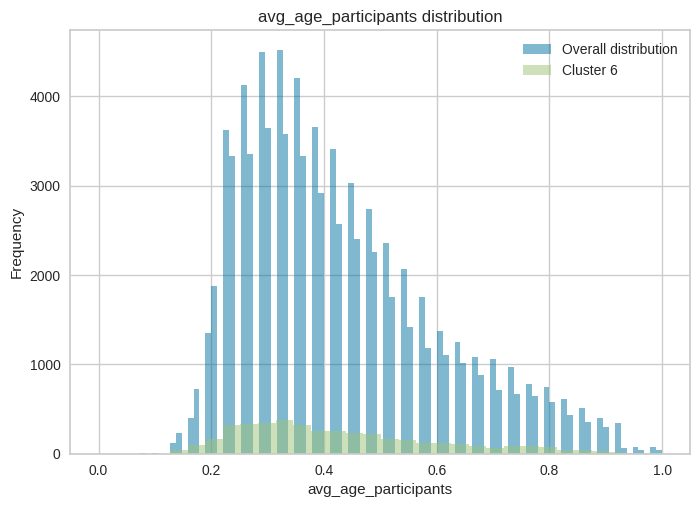

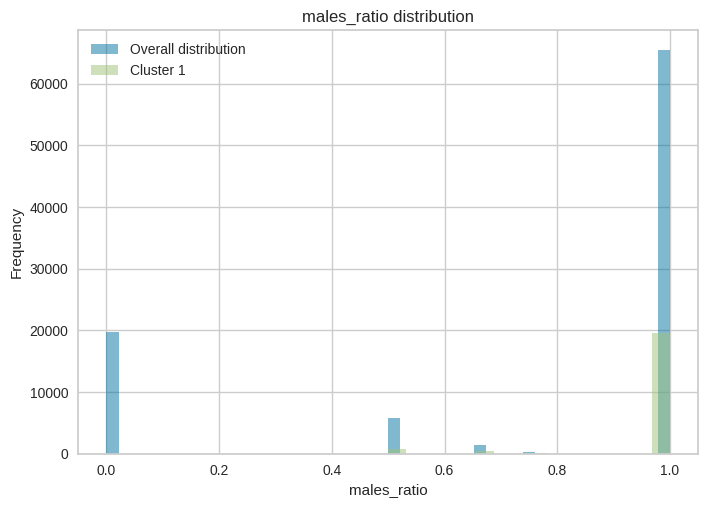

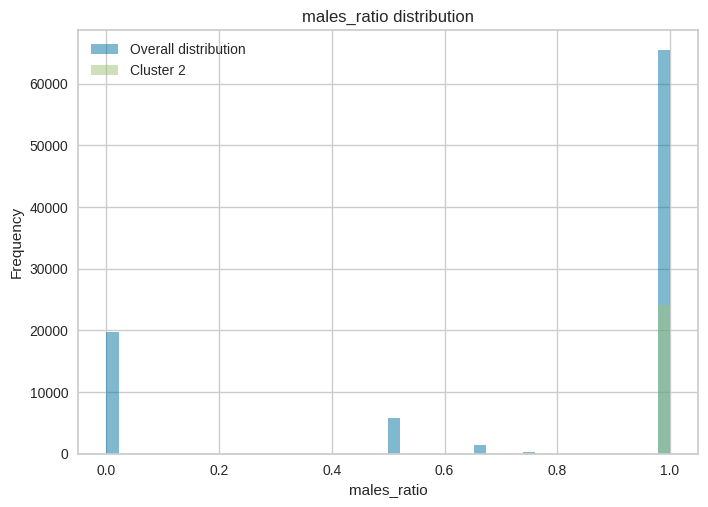

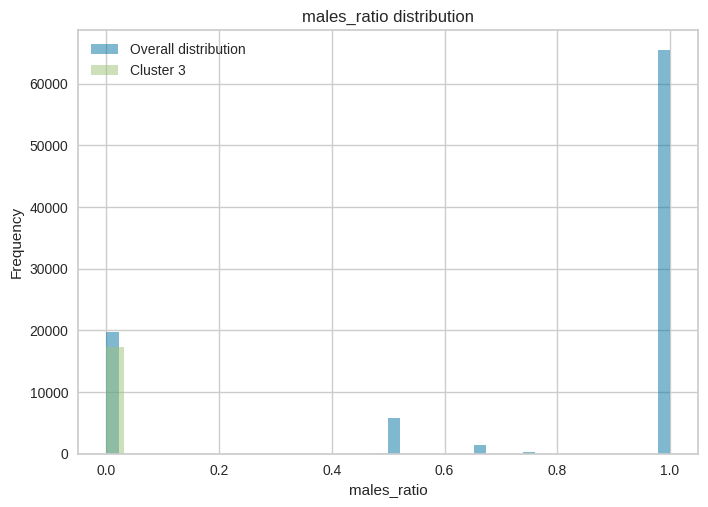

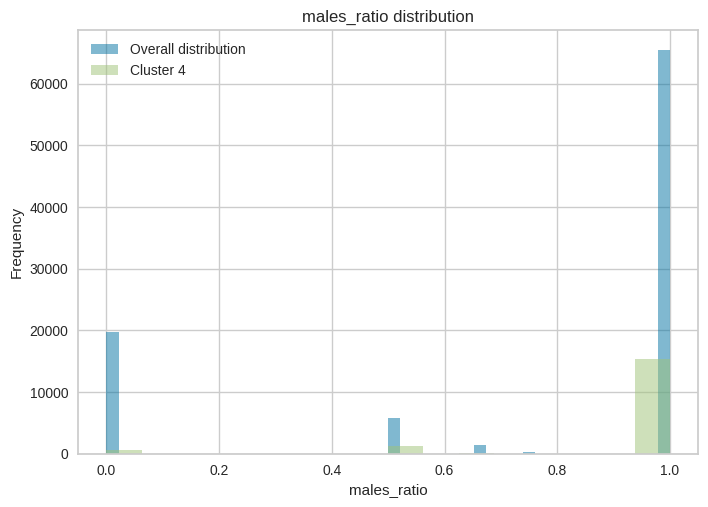

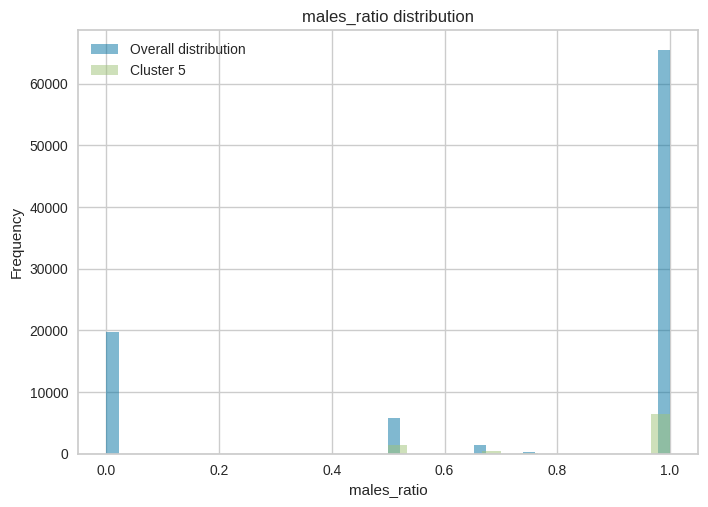

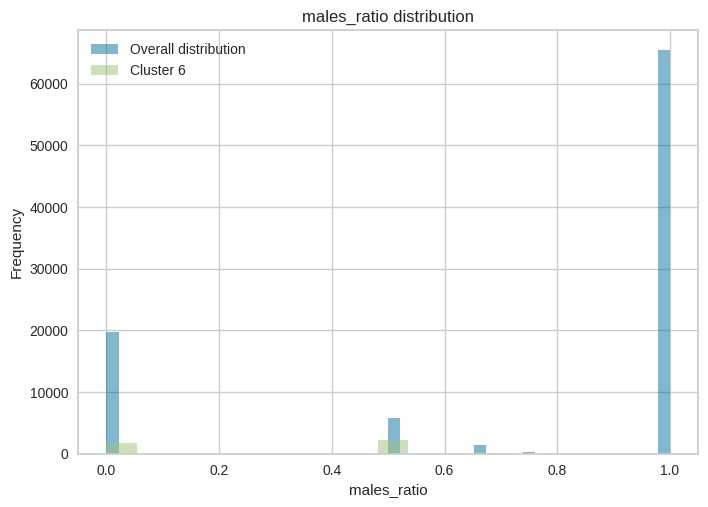

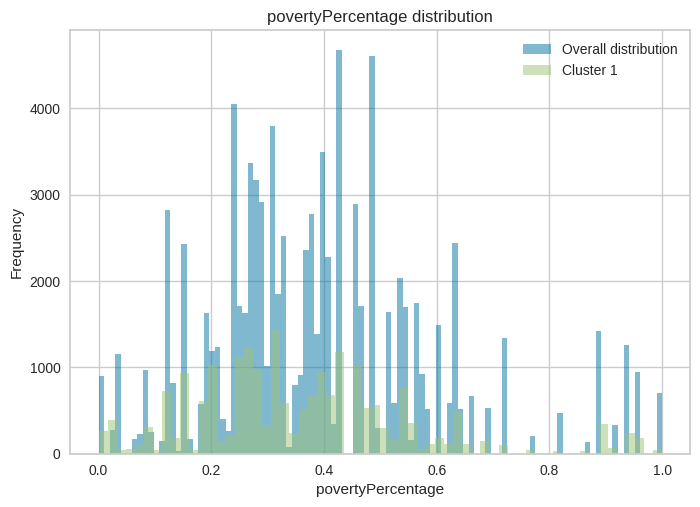

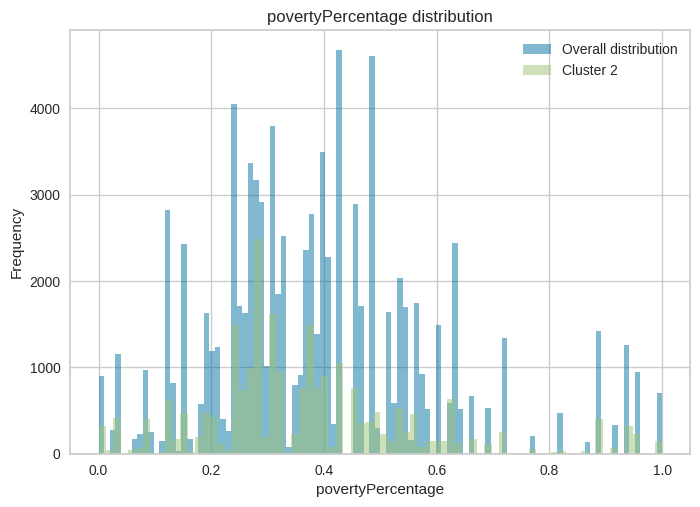

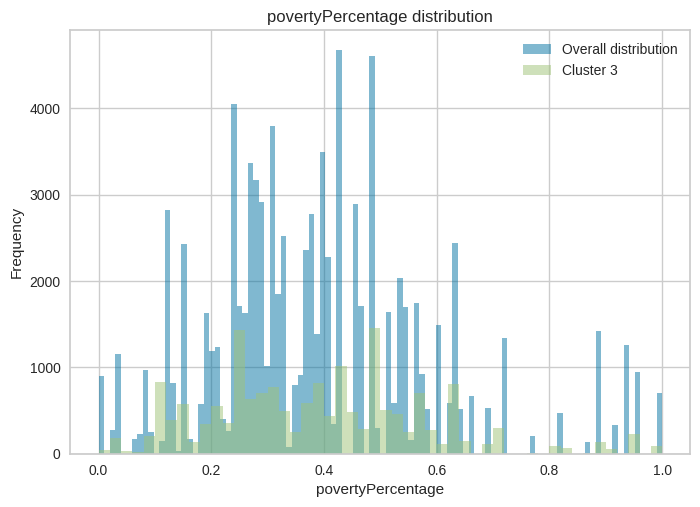

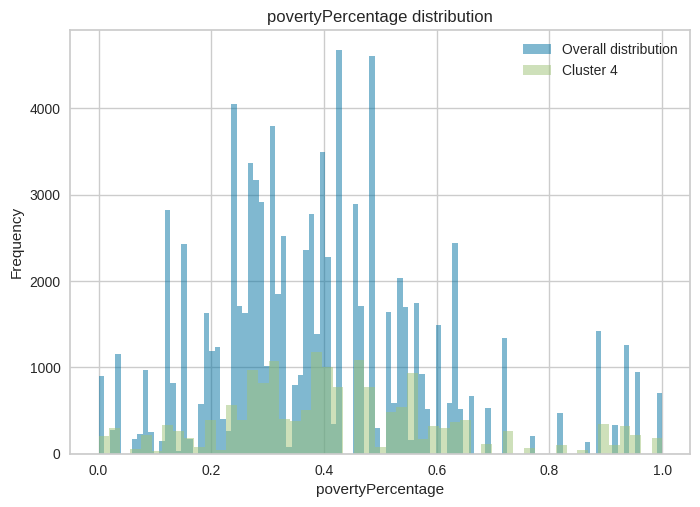

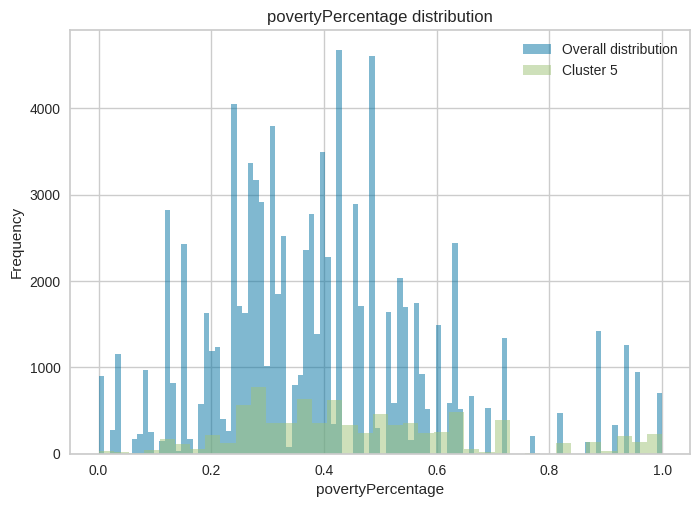

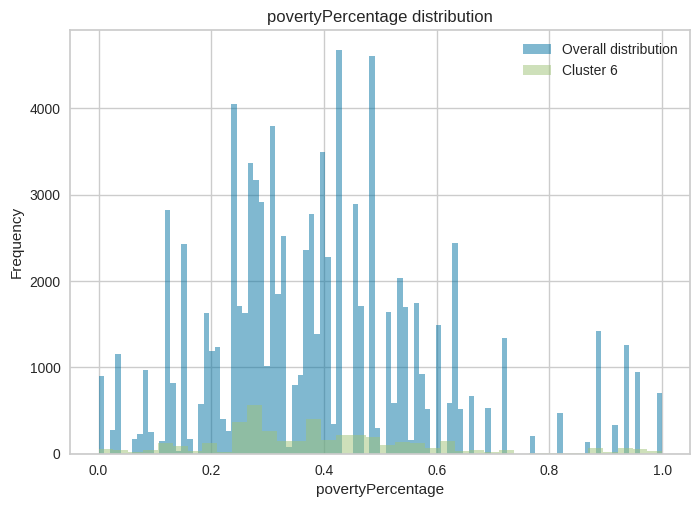

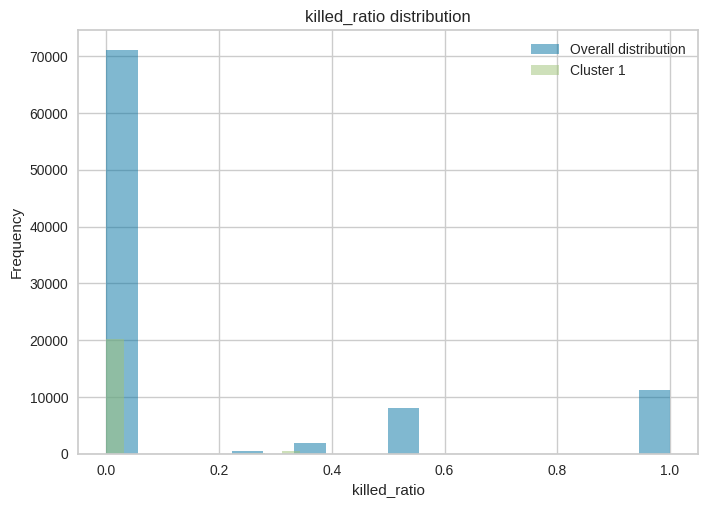

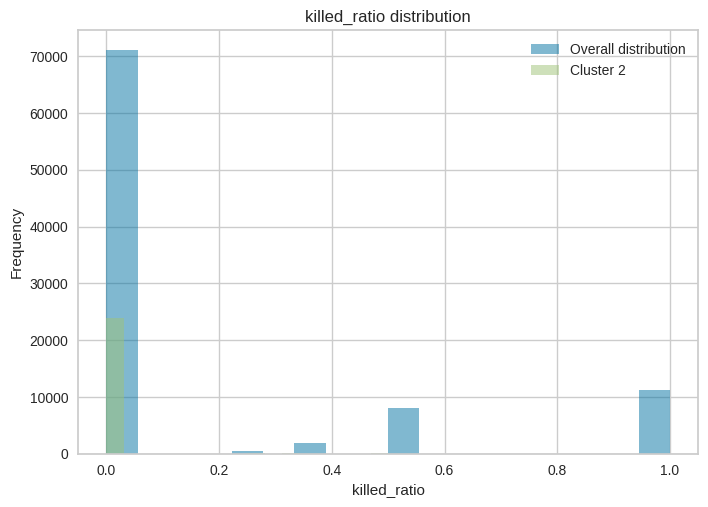

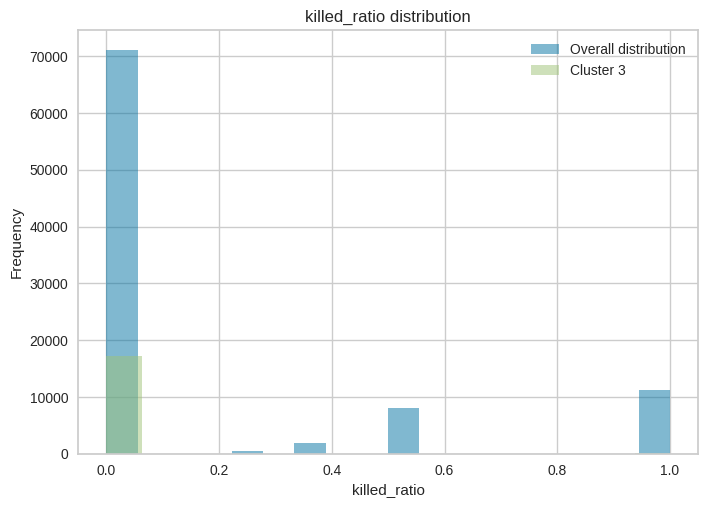

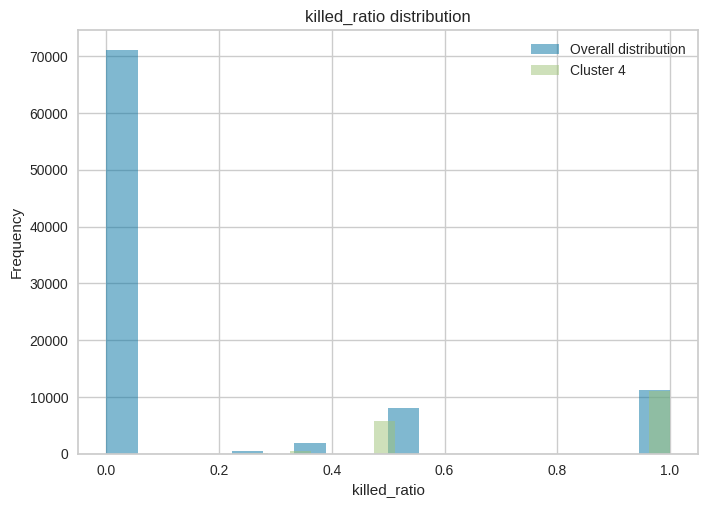

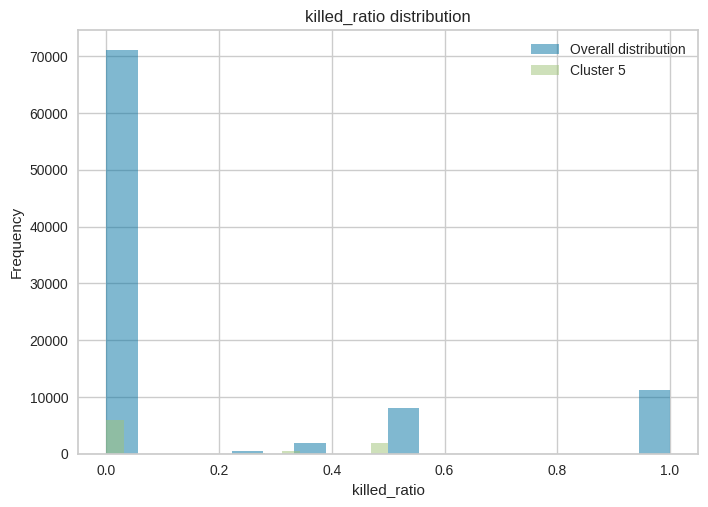

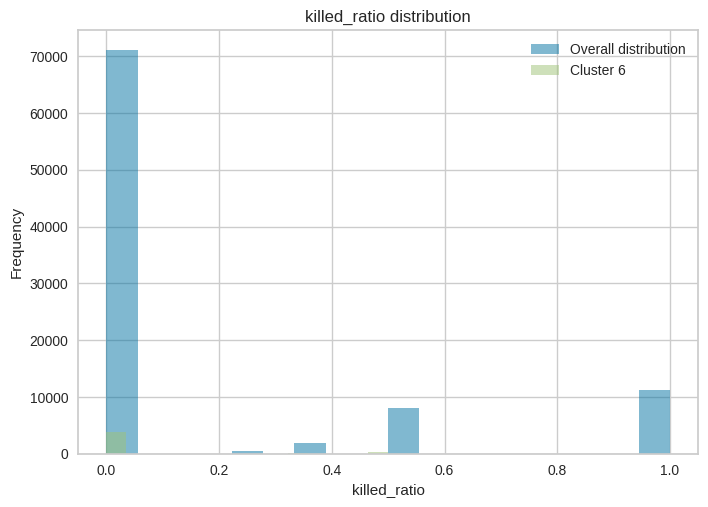

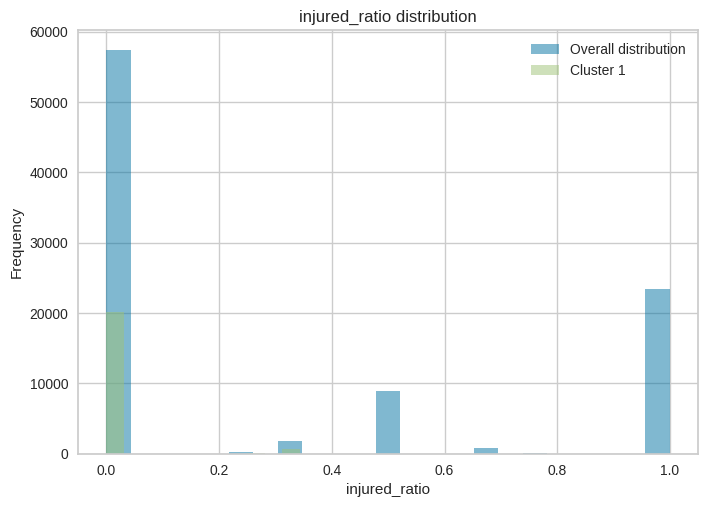

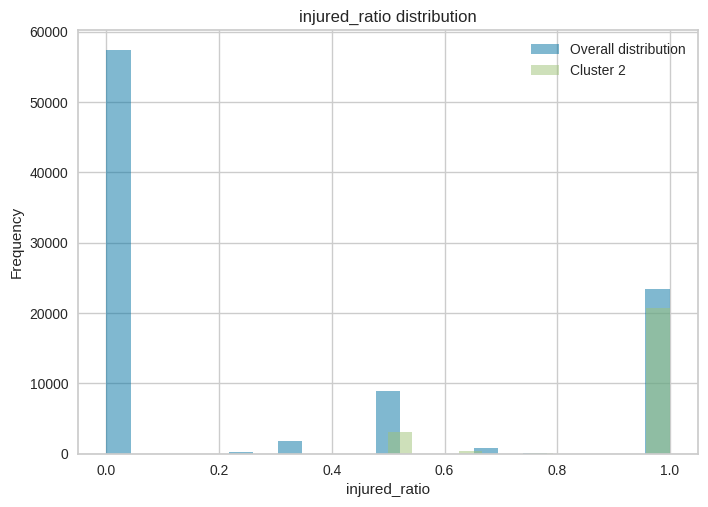

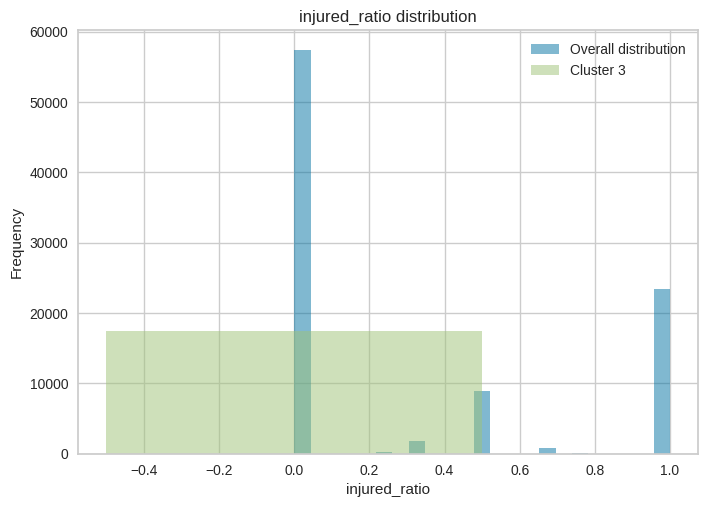

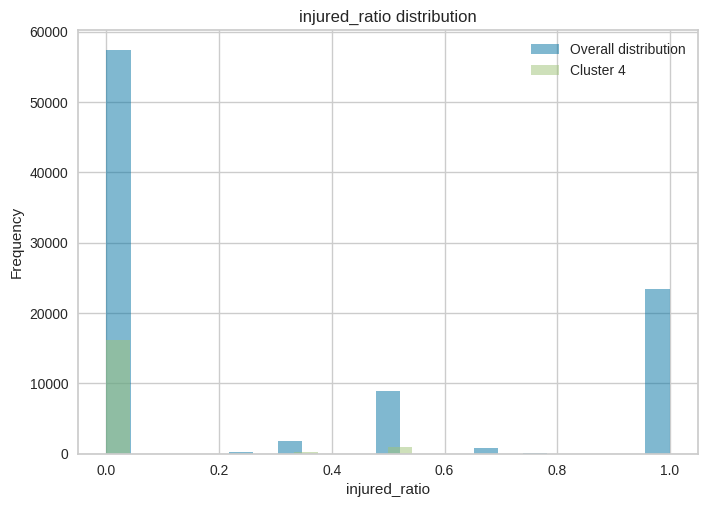

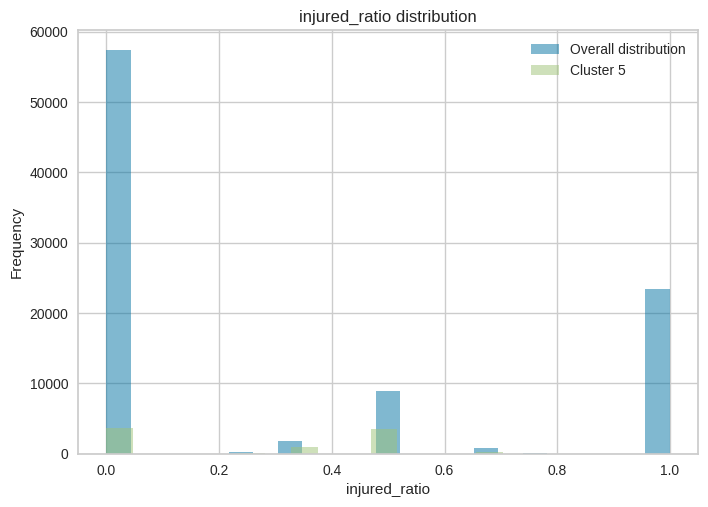

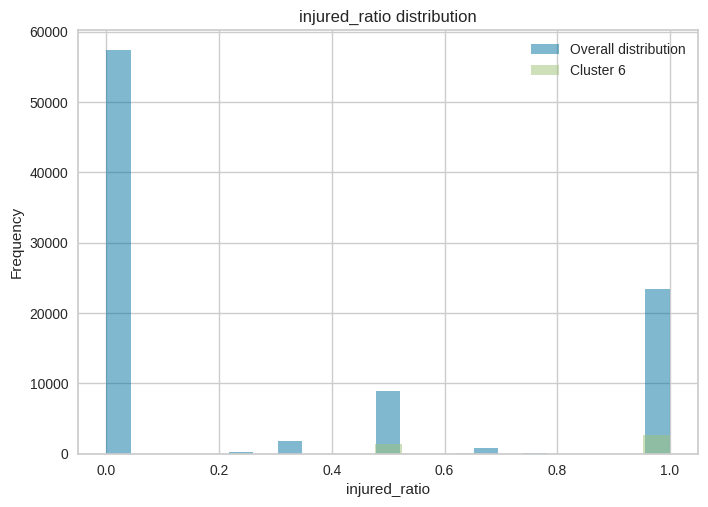

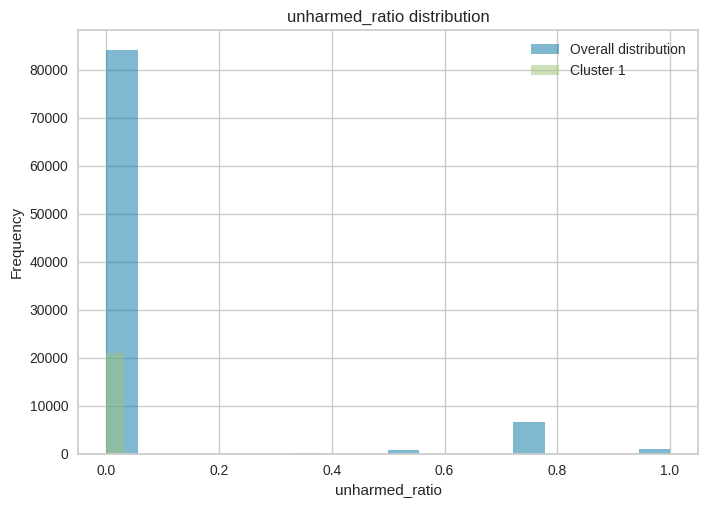

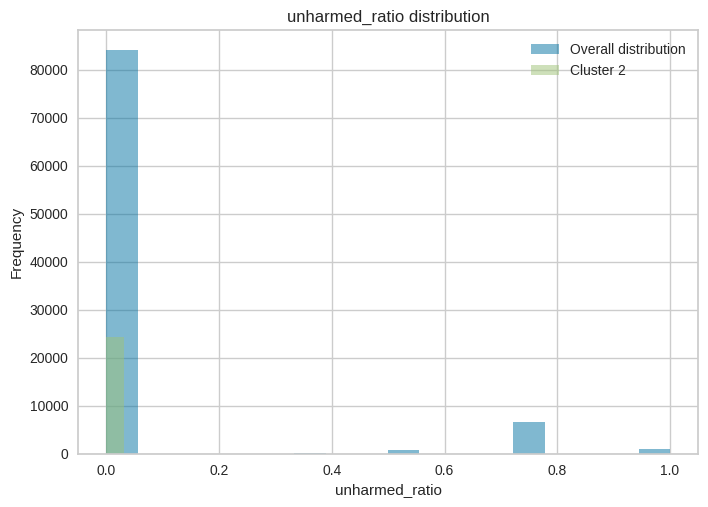

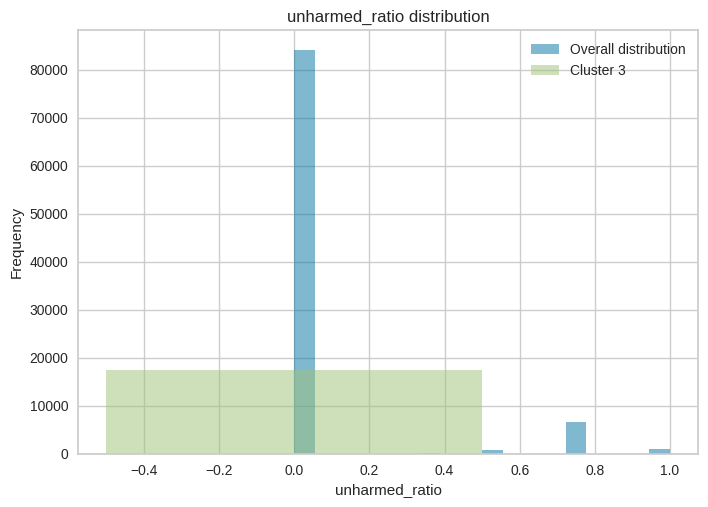

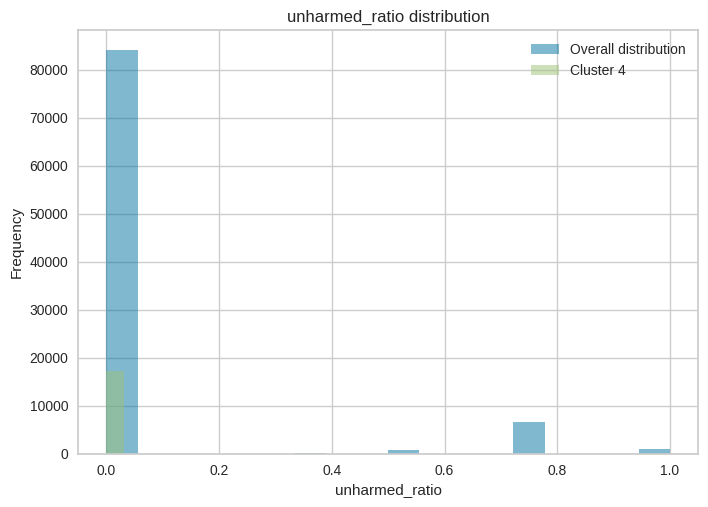

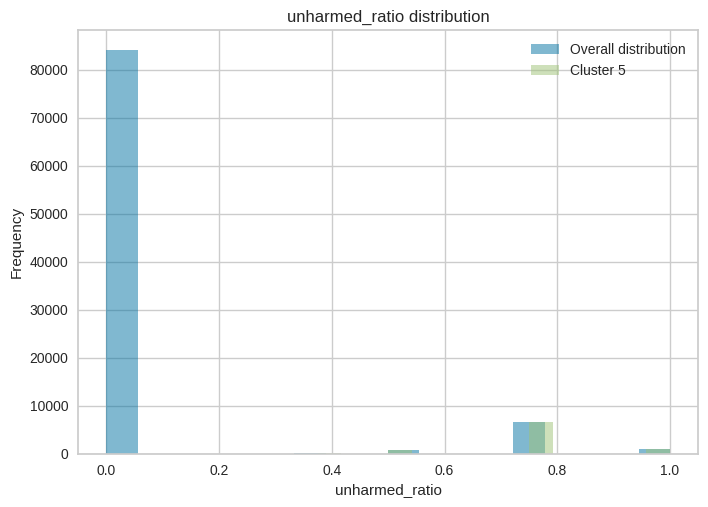

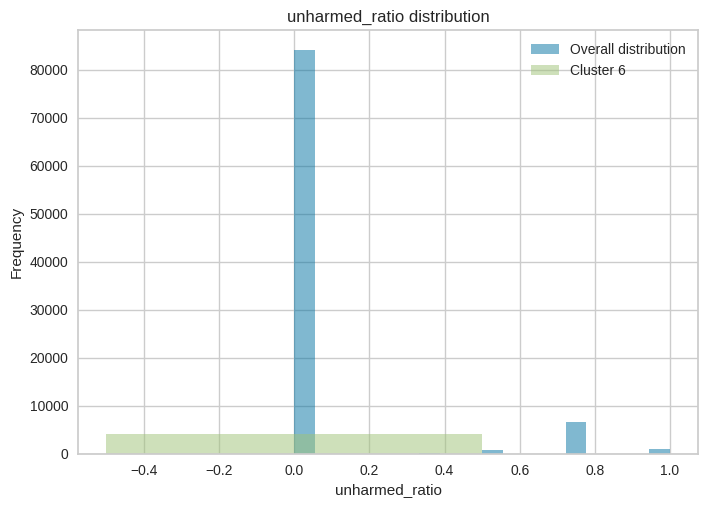

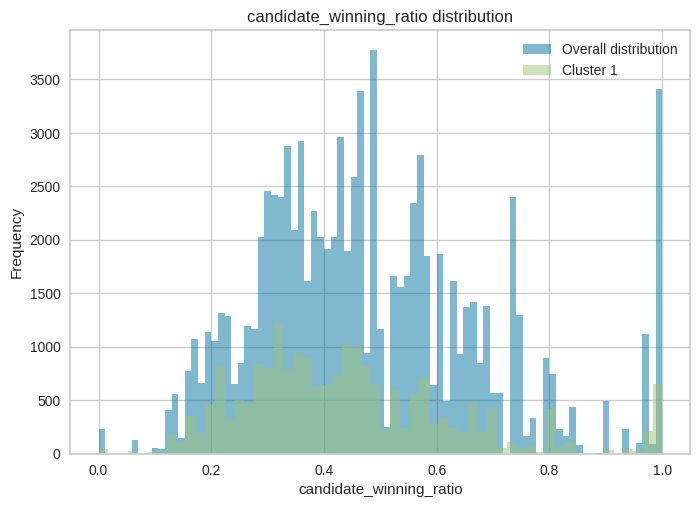

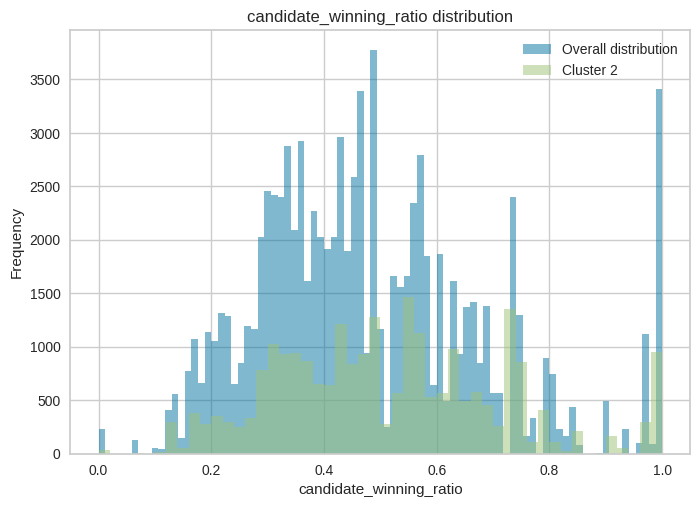

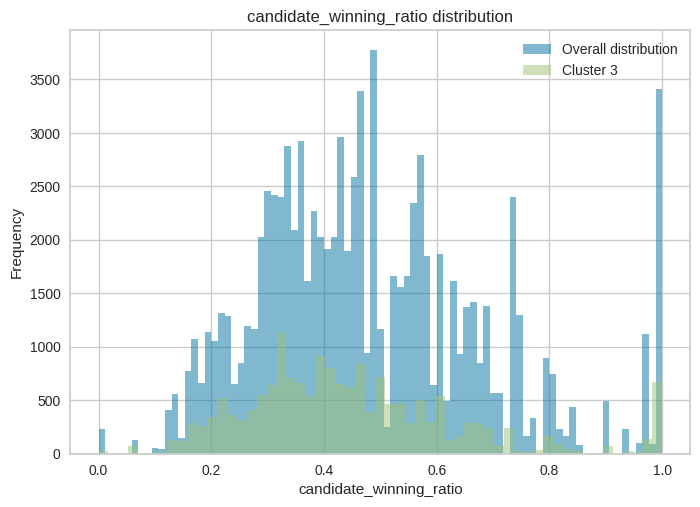

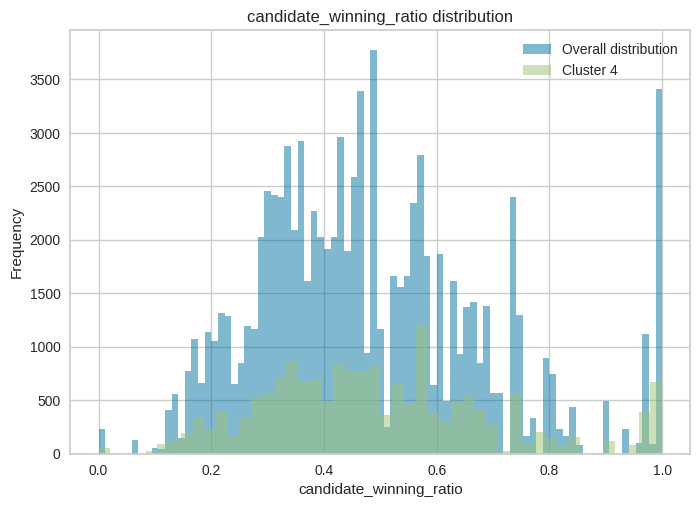

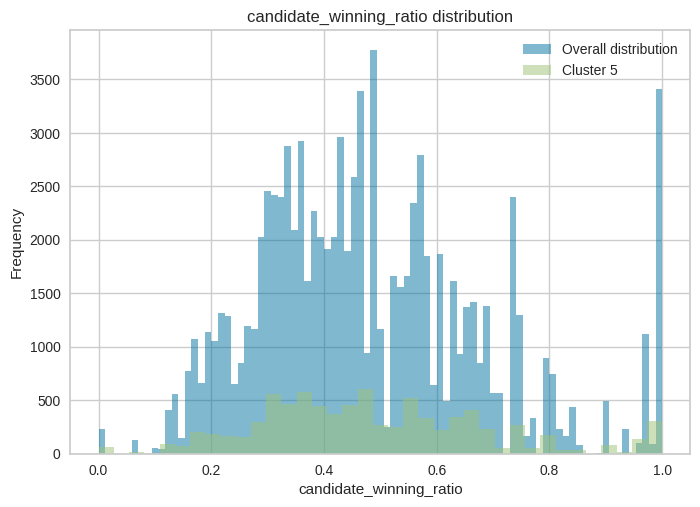

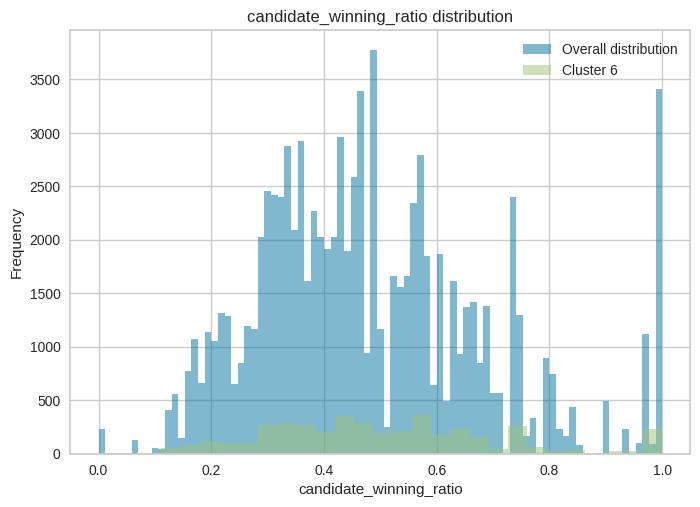

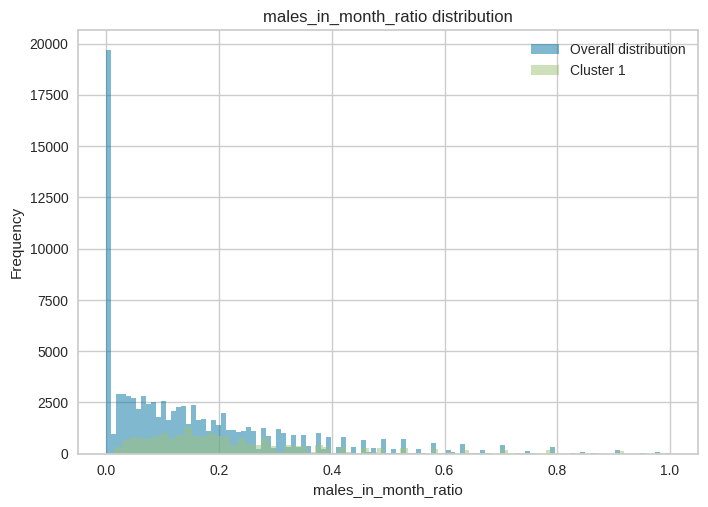

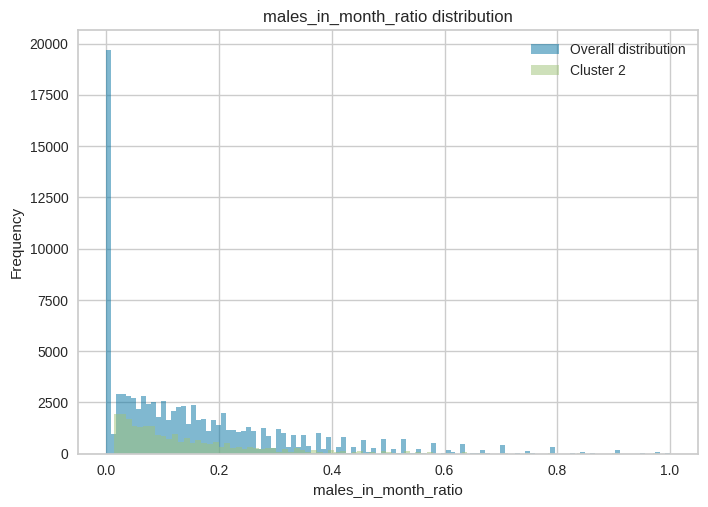

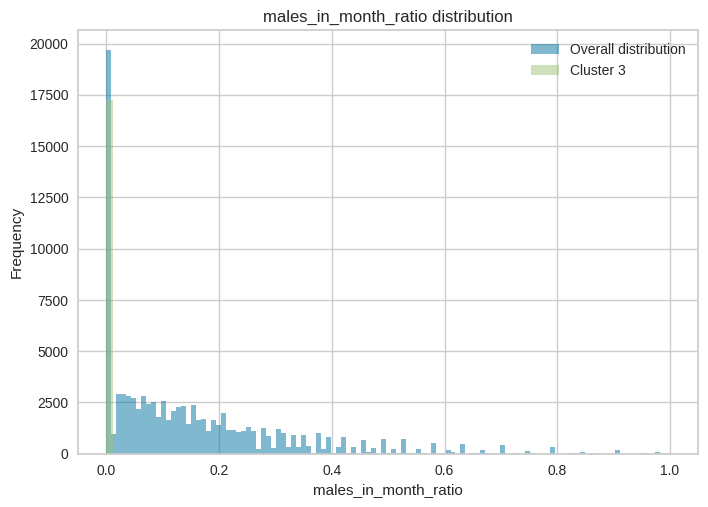

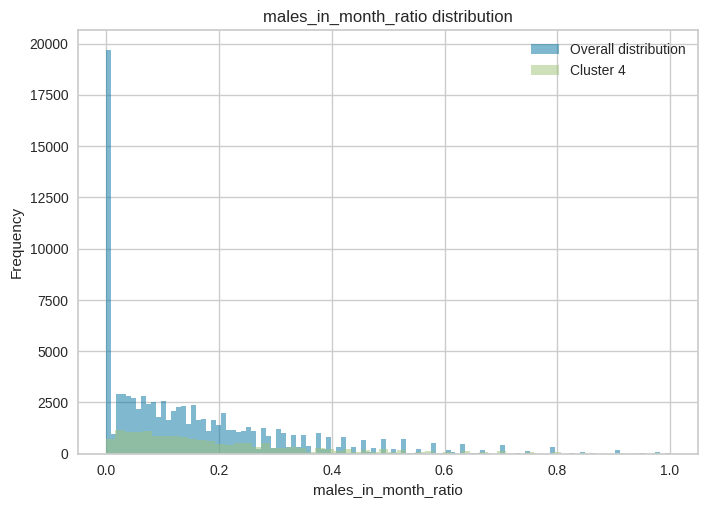

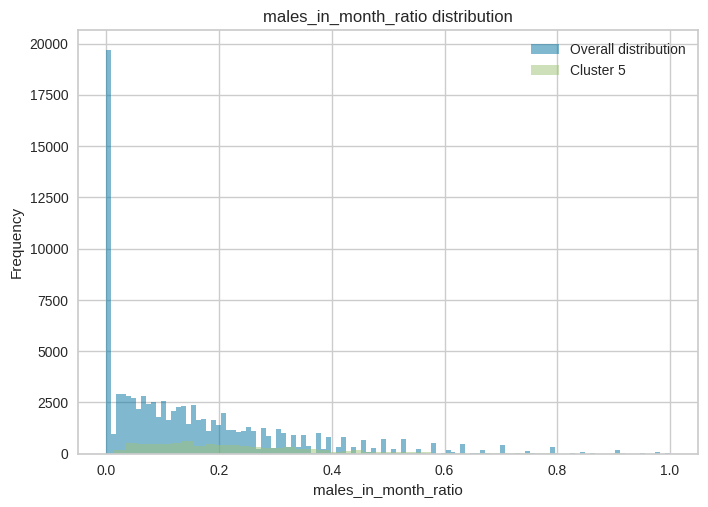

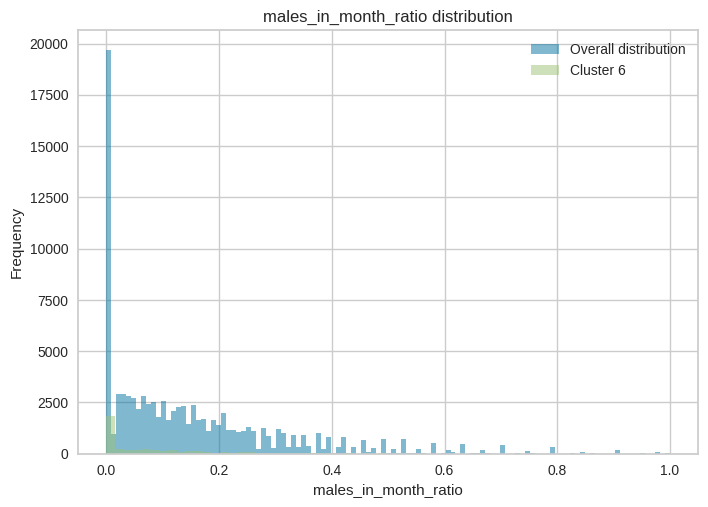

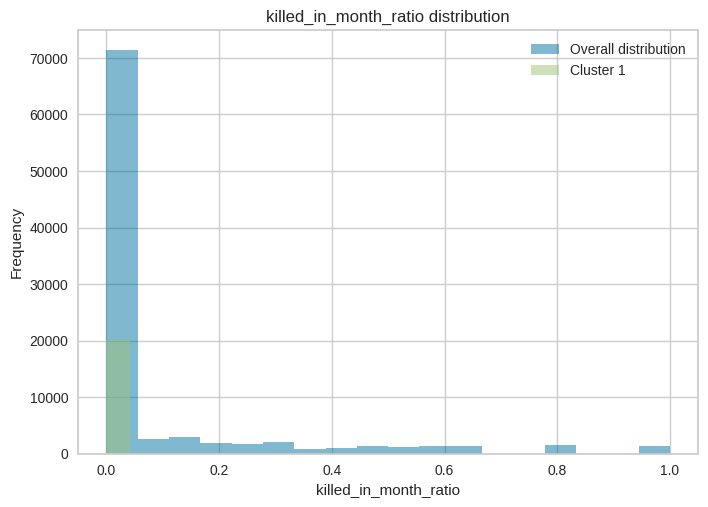

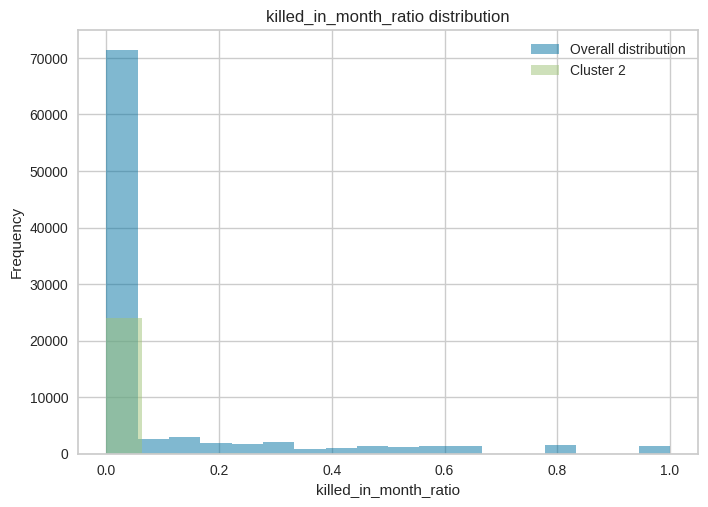

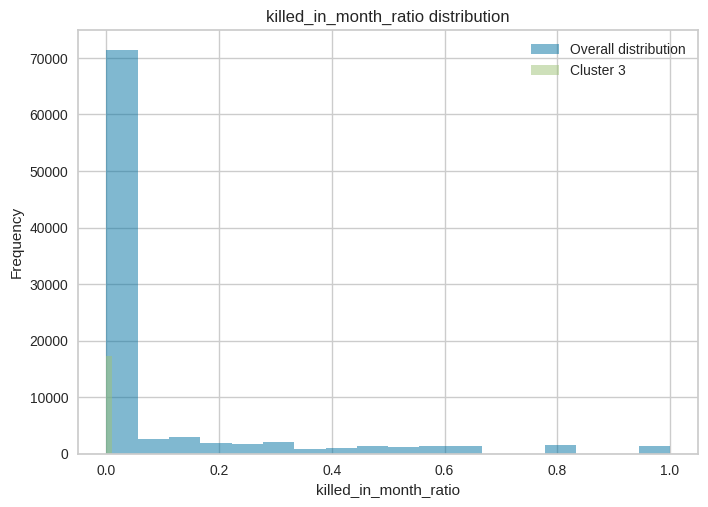

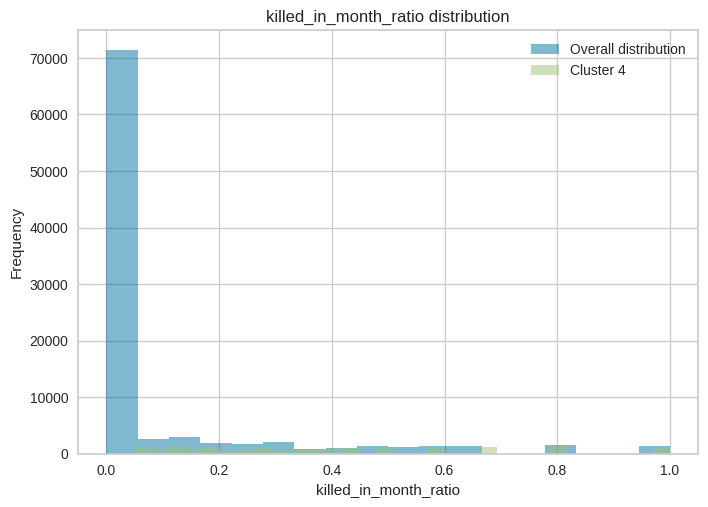

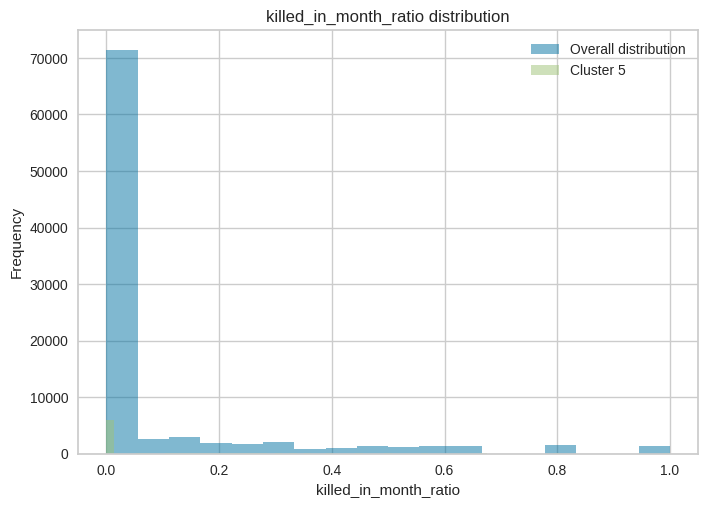

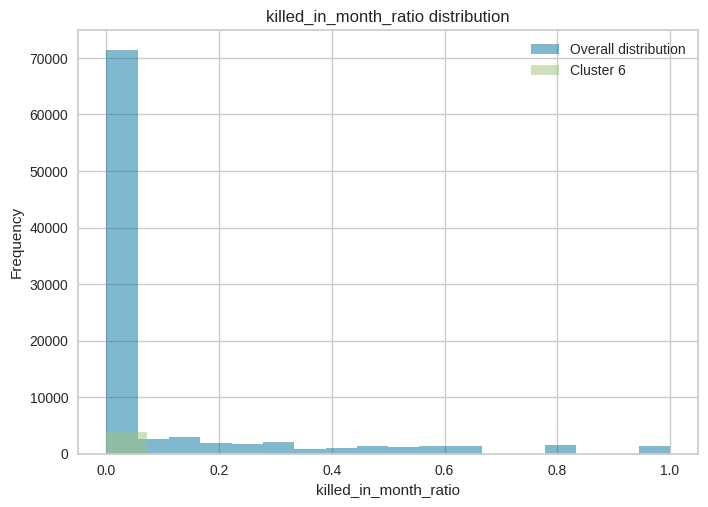

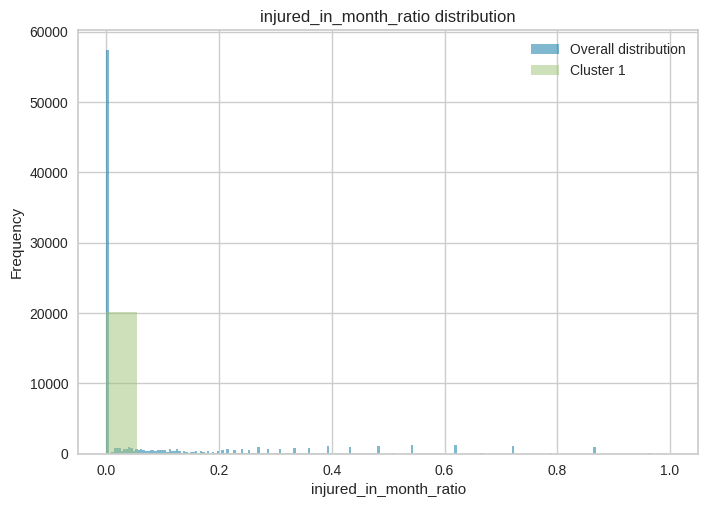

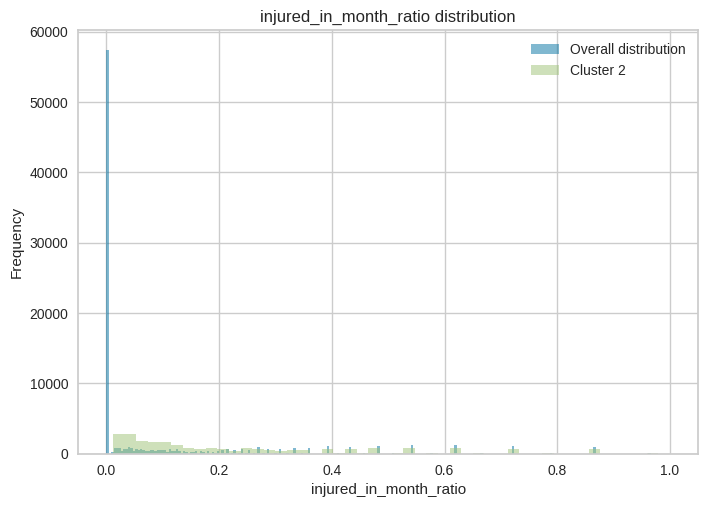

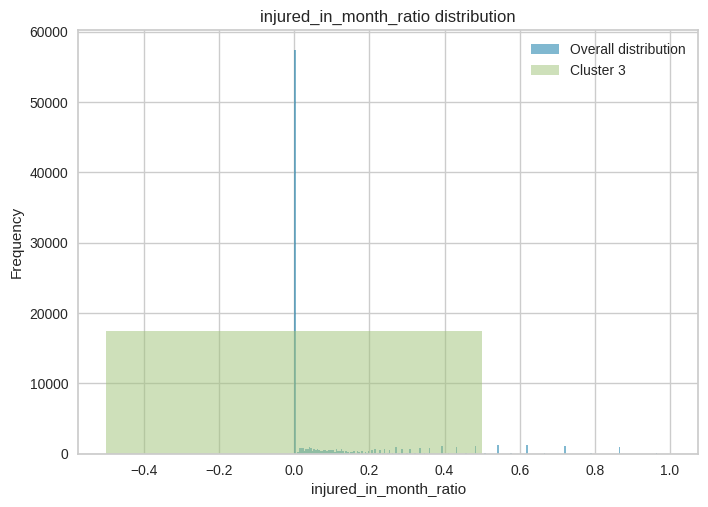

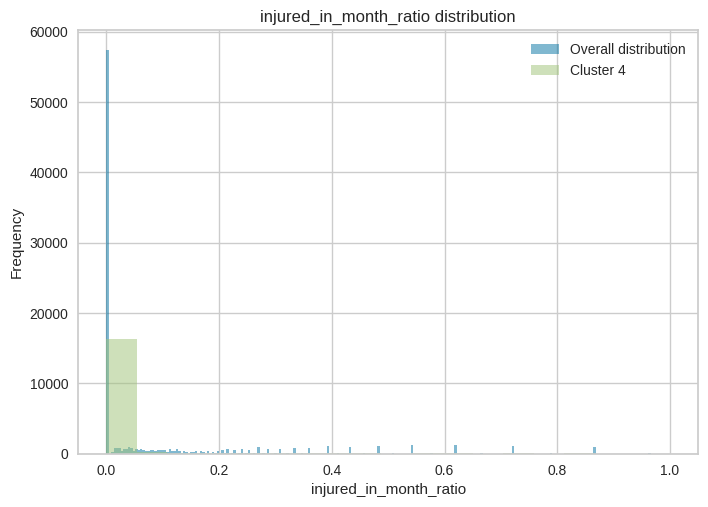

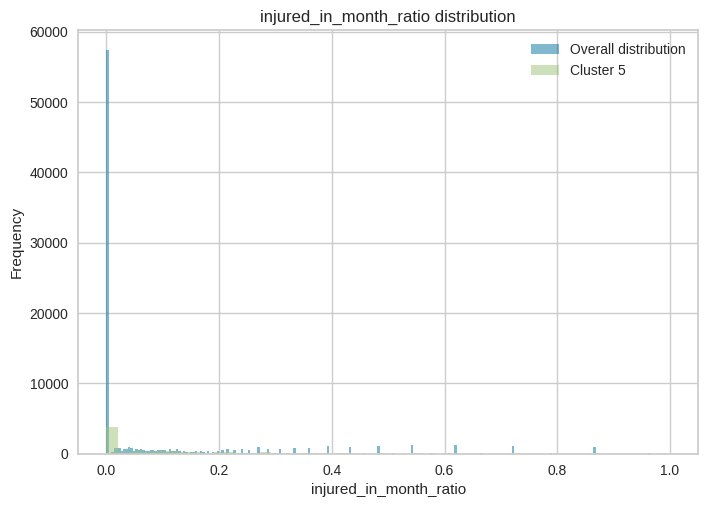

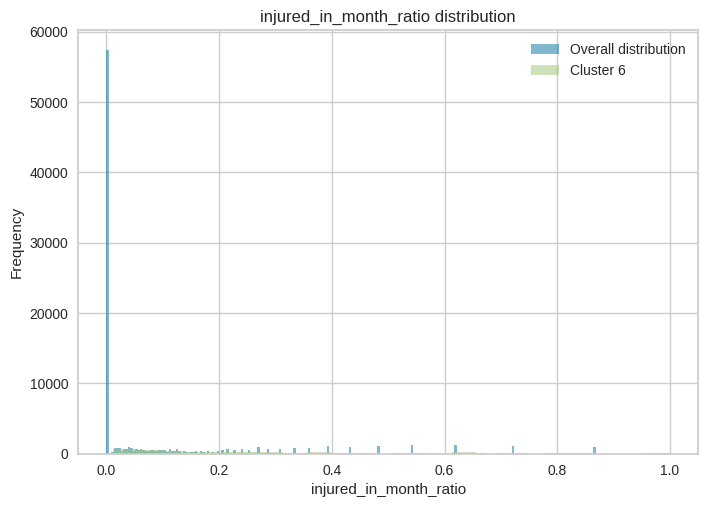

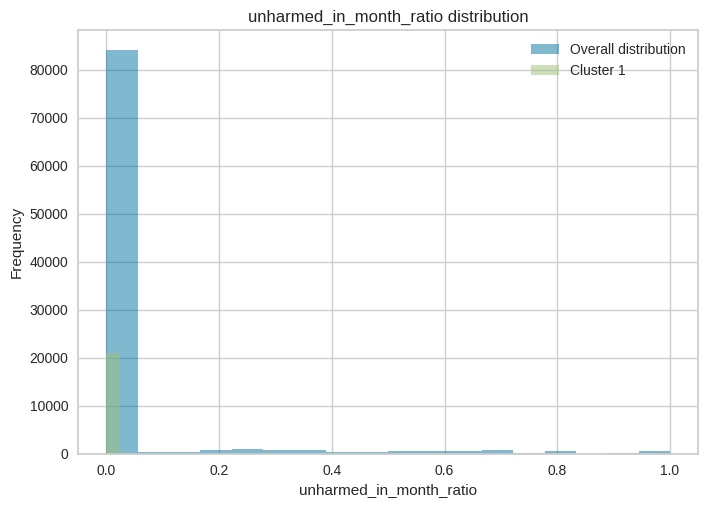

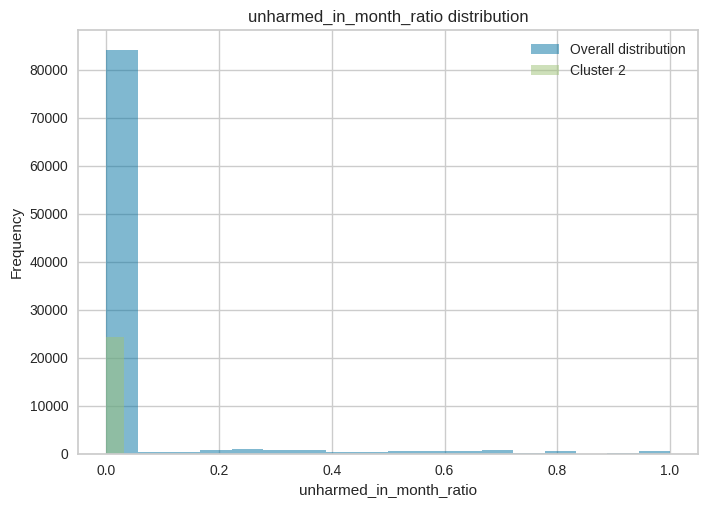

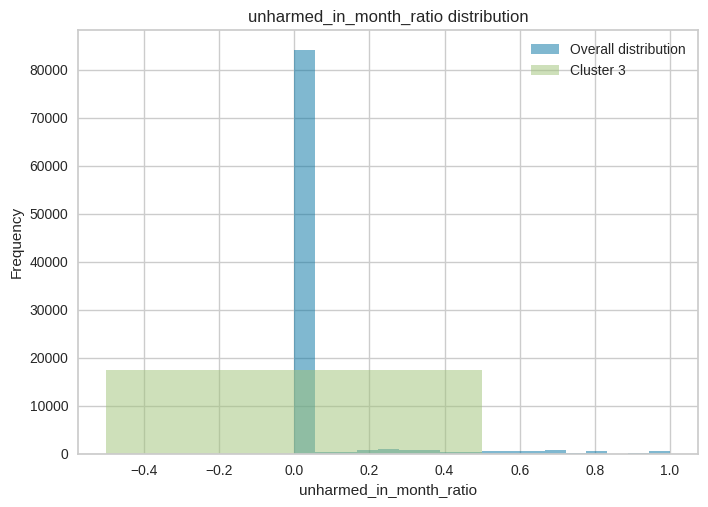

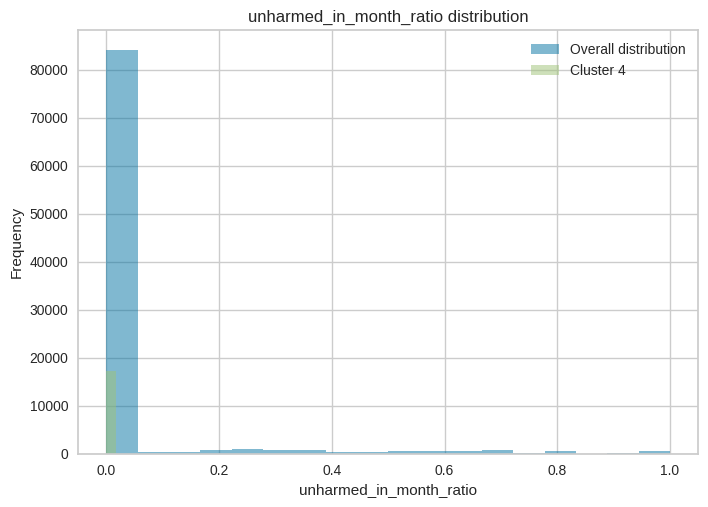

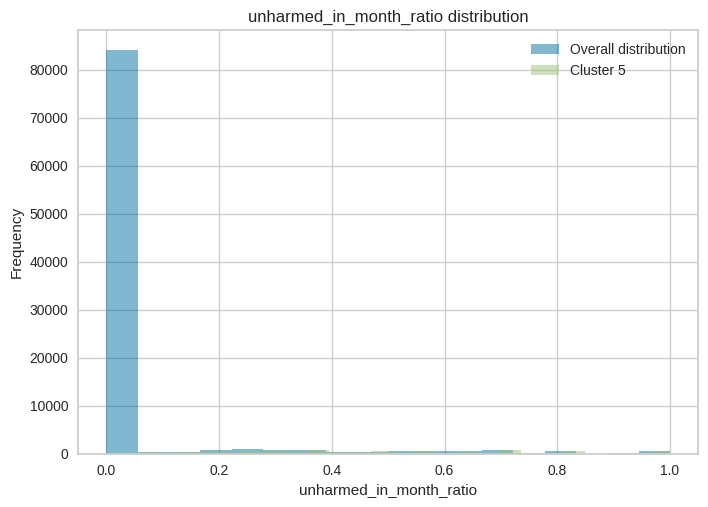

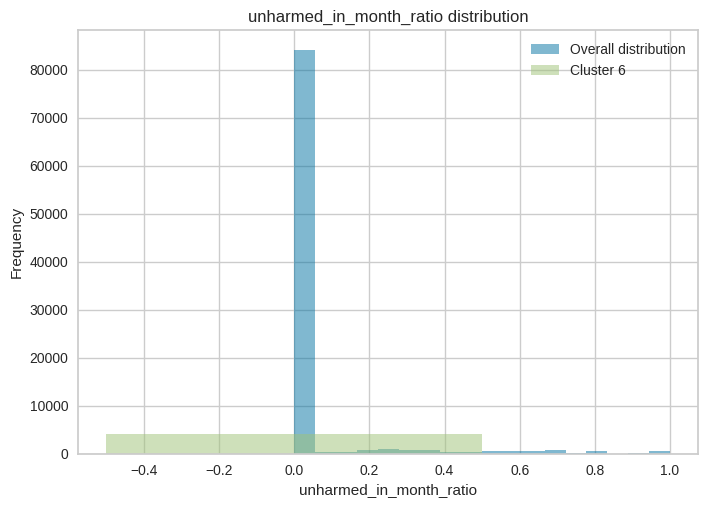

In [32]:
# Perform K-means clustering with the optimal k value
k_optimal2 = 6
kmeans_6 = KMeans(n_clusters=k_optimal2)
kmeans_6.fit(X_normalized_minmax)
labels2 = kmeans_6.labels_

# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal2):
    cluster_data = X_normalized_minmax[labels2 == k]
    print('Cluster', k + 1)
    print(cluster_data.describe())

# Compare the distribution of variables within each cluster to the overall distribution of the variables in the entire dataset
for col in X_normalized_minmax.columns:
    all_data = X_normalized_minmax[col]
    for k in range(k_optimal2):
        cluster_data = X_normalized_minmax[labels2 == k][col]
        plt.hist(all_data, bins='auto', alpha=0.5, label='Overall distribution')
        plt.hist(cluster_data, bins='auto', alpha=0.5, label=f'Cluster {k + 1}')
        plt.title(f'{col} distribution')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()


In [33]:
# Calculate silhouette score
silhouette_score_val2 = silhouette_score(X_normalized_minmax, labels2)
print(f'Silhouette score: {silhouette_score_val2:.2f}')

# Calculate Calinski-Harabasz score
calinski_harabasz_score_val2 = calinski_harabasz_score(X_normalized_minmax, labels2)
print(f'Calinski-Harabasz score: {calinski_harabasz_score_val2:.2f}')

Silhouette score: 0.36
Calinski-Harabasz score: 32907.92


In [34]:
# Analyze the obtained clusters by calculating summary statistics for each variable within each cluster
for k in range(k_optimal2):
    cluster_data = X_normalized_minmax[labels2 == k]
    print('Cluster', k + 1, len(cluster_data))

Cluster 1 20912
Cluster 2 24278
Cluster 3 17377
Cluster 4 17325
Cluster 5 8480
Cluster 6 4189
